# Where Business Thrives: A Country-by-Country Financial Indicator Comparison

# Table of Contents

1. [Introduction](#Introduction)
2. [Data Extraction and Overview](#Data-Extraction-and-Overview)
3. [Accrued Expenses Turnover Analysis](#Accrued-Expenses-Turnover-Analysis)
4. [Indicator Analysis Across Key Financial Categories](#Indicator-Analysis-Across-Key-Financial-Categories)
   - 4.1 [Profitability Indicators Analysis](#Profitability-Indicators-Analysis)
   - 4.2 [Liquidity Indicators Analysis](#Liquidity-Indicators-Analysis)
   - 4.3 [Efficiency Indicators Analysis](#Efficiency-Indicators-Analysis)
   - 4.4 [Leverage Indicators Analysis](#Leverage-Indicators-Analysis)
   - 4.5 [Growth Indicators Analysis](#Growth-Indicators-Analysis)
5. [Profitability Indicators Across Countries](#Profitability-Indicators-Across-Countries)
6. [Liquidity Indicators Across Countries](#Liquidity-Indicators-Across-Countries)
7. [Efficiency Indicators Across Countries](#Efficiency-Indicators-Across-Countries)
8. [Leverage Indicators Across Countries](#Leverage-Indicators-Across-Countries)
9. [Growth Indicators Across Countries](#Growth-Indicators-Across-Countries)
10. [Key Insights from Financial Indicators Across Countries](#Key-Insights-from-Financial-Indicators-Across-Countries)
11. [Conclusion](#Conclusion)

## Introduction

This project aims to analyze financial performance across various countries, focusing on key metrics that impact business success. By examining profitability, liquidity, efficiency, leverage, and growth indicators, the goal is to identify patterns and highlight the most financially favorable countries for running a business. Each metric provides insights into different aspects of financial health, from cash flow stability to effective asset utilization.

To achieve this, I aggregated and analyzed data across several financial dimensions, using descriptive statistics and visualizations to assess each indicator by country. Specific metrics, such as EBITDA, Current Ratio, Total Asset Turnover, Debt-to-Equity Ratios, and Return on Equity, were evaluated to gain a complete understanding of each country’s financial strengths and weaknesses. 

The analysis revealed the **United States**, **Ireland**, and **Japan** as the top-performing countries, each displaying a balanced combination of profitability, efficient asset and liability management, and growth potential. These findings offer a comprehensive view of the financial landscapes across countries, highlighting locations with promising conditions for business success.

## Data Extraction and Overview

In [6]:
# Import necessary libraries for data retrieval, configuration, and visualization
import requests        # For making API requests
import config          # Custom config file for storing sensitive data like the API key
import pandas as pd    # For data manipulation and analysis
import matplotlib.pyplot as plt  # For plotting and visualizing data
%matplotlib inline

# Set pandas to display all floating-point numbers with two decimal places for readability
pd.set_option('display.float_format', lambda x: '%.2f' % x)

# Base URL for the Nasdaq Data Link API, focusing on the MER/F1 datatable, which holds financial information
base_url = 'https://data.nasdaq.com/api/v3/datatables/MER/F1.json'

# API key retrieved from the config file for authentication
api_key = config.API_KEY

# Set up parameters for the API request, including pagination for handling large datasets
parameters = {
    'qopts.per_page': 10000,  # Fetch up to 10,000 records per request
    'api_key': api_key        # Attach the API key for authentication
}

# Make a GET request to the API and handle potential errors
try:
    # Send the request to the API with the specified parameters
    response = requests.get(base_url, params=parameters)
    # Raise an HTTPError if the response status code is not 200 (successful)
    response.raise_for_status()
except RequestException as e:
    print(f'Request error occurred: {e}')
except HTTPError as e:
    print(f'HTTP error occurred: {e}')
except Exception as e:
    print(f"An unexpected error occurred: {e}")

# Extract raw JSON data from the response
raw_json_data = response.json()

# Extract the table data and columns from the JSON response
table_data = raw_json_data['datatable']['data']        # Data rows
table_columns = raw_json_data['datatable']['columns']  # Column metadata

# Retrieve column names from the metadata for use in the DataFrame
columns_names = [col['name'] for col in table_columns]

# Create a DataFrame with the extracted data and column names
df_metric = pd.DataFrame(table_data, columns=columns_names)

# Display the first few rows of the DataFrame to verify data loading
df_metric.head()

,compnumber,reportid,mapcode,amount,reportdate,reporttype,auditorstatus,currency,consolidated,longname,...,city,statecode,country,zipcode,phonenumber,faxnumber,website,fye,indicator,statement
0,2438,1868192544,-1802,10.48,2011-06-30,Q2,U,EUR,True,Deutsche Bank AG,...,Frankfurt am Main,None,DEU,60325,(49) 69 910 00,(49) 69 910 34 225,www.db.com,2023-12-31,Accrued Expenses Turnover,Derived
1,2438,1868216112,-1802,8.16,2011-09-30,Q3,U,EUR,True,Deutsche Bank AG,...,Frankfurt am Main,None,DEU,60325,(49) 69 910 00,(49) 69 910 34 225,www.db.com,2023-12-31,Accrued Expenses Turnover,Derived
2,2438,1885063456,-1802,10.79,2012-06-30,Q2,U,EUR,True,Deutsche Bank AG,...,Frankfurt am Main,None,DEU,60325,(49) 69 910 00,(49) 69 910 34 225,www.db.com,2023-12-31,Accrued Expenses Turnover,Derived
3,2438,1885087024,-1802,9.44,2012-09-30,Q3,U,EUR,True,Deutsche Bank AG,...,Frankfurt am Main,None,DEU,60325,(49) 69 910 00,(49) 69 910 34 225,www.db.com,2023-12-31,Accrued Expenses Turnover,Derived
4,2438,1901934112,-1802,8.76,2013-06-30,Q2,U,EUR,True,Deutsche Bank AG,...,Frankfurt am Main,None,DEU,60325,(49) 69 910 00,(49) 69 910 34 225,www.db.com,2023-12-31,Accrued Expenses Turnover,Derived


In [7]:
def explore(df):
    '''
    Function to explore datasets displaying:
    - The shape of the DataFrame
    - Information about the DataFrame
    - The null values for each column
    '''
    print('DataFrame Shape: ', df_metric.shape) # Display the shape of the DataFrame
    
    print('\nData Overview:')
    print(df.info())  # Print information about the DataFrame including data types and non-null counts
    
    print('\nNull values:')
    print(df.isnull().sum())  # Show the null values for each column

explore(df_metric)

DataFrame Shape:  (10000, 32)

Data Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 32 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   compnumber     10000 non-null  int64  
 1   reportid       10000 non-null  int64  
 2   mapcode        10000 non-null  int64  
 3   amount         10000 non-null  float64
 4   reportdate     10000 non-null  object 
 5   reporttype     10000 non-null  object 
 6   auditorstatus  9999 non-null   object 
 7   currency       10000 non-null  object 
 8   consolidated   10000 non-null  object 
 9   longname       10000 non-null  object 
 10  shortname      10000 non-null  object 
 11  status         10000 non-null  object 
 12  countrycode    10000 non-null  object 
 13  region         10000 non-null  object 
 14  cik            10000 non-null  int64  
 15  mic            10000 non-null  object 
 16  ticker         9380 non-null   object 
 17  excha

In [8]:
# Define a mapping dictionary for country codes to full names
country_mapping = {
    'DEU': 'Germany', 'CAN': 'Canada', 'ISR': 'Israel', 'FIN': 'Finland', 'IND': 'India',
    'BRA': 'Brazil', 'IDN': 'Indonesia', 'AUS': 'Australia', 'BHS': 'Bahamas', 'CYM': 'Cayman Islands',
    'BEL': 'Belgium', 'FRA': 'France', 'GBR': 'United Kingdom', 'CHL': 'Chile', 'USA': 'United States of America',
    'JPN': 'Japan', 'KOR': 'South Korea', 'ESP': 'Spain', 'ITA': 'Italy', 'HKG': 'Hong Kong',
    'DNK': 'Denmark', 'IRL': 'Ireland', 'CHE': 'Switzerland'
}

# Replace country codes with full names in the 'country' column using .loc
df_metric.loc[:, 'country'] = df_metric['country'].map(country_mapping)

df_metric = df_metric.rename(
    columns={
        'longname': 'company_name',  # Renaming for clarity
        'reportdate': 'report_date',
        'reporttype': 'report_type'
    }
)

# Define the list of columns crucial for the analysis
necessary_columns = [
    'amount',        # Financial metric value
    'report_date',   # Date of the financial report
    'report_type',   # Type of the report (e.g., Q1, Q2)
    'currency',      # Currency in which financial amounts are reported
    'company_name',  # Company name
    'country',       # Country or region where the company is situated
    'indicator',     # Specific financial metric or indicator
    'statement'      # Type of financial statement
]

# Create a new DataFrame with only the selected columns
df_filtered = df_metric[necessary_columns]

# Display the first few rows of the new filtered DataFrame to verify the selected columns
df_filtered.head()

,amount,report_date,report_type,currency,company_name,country,indicator,statement
0,10.48,2011-06-30,Q2,EUR,Deutsche Bank AG,Germany,Accrued Expenses Turnover,Derived
1,8.16,2011-09-30,Q3,EUR,Deutsche Bank AG,Germany,Accrued Expenses Turnover,Derived
2,10.79,2012-06-30,Q2,EUR,Deutsche Bank AG,Germany,Accrued Expenses Turnover,Derived
3,9.44,2012-09-30,Q3,EUR,Deutsche Bank AG,Germany,Accrued Expenses Turnover,Derived
4,8.76,2013-06-30,Q2,EUR,Deutsche Bank AG,Germany,Accrued Expenses Turnover,Derived


## Key Column Analysis for Financial Trends and Regional Impact

Certain columns in this analysis allow the view of how 'accrued expenses turnover' may trend across companies, particularly banks, and the regional contributions to these financial metrics. Here's why each column chosen will be necessary:

- **amount**: The numerical value of each financial metric. This column is central to analysis because it holds the actual metric data that will be aggregated, compared and visualized over time.

- **report_date**: Date of each report. The date is helpful in conducting time-series analysis and tracking financial performance trends over different periods.

- **report_type**: The frequency of reporting, for instance, quarterly or annual, hence helps in aggregation of data by reporting frequency, and gives apples-to-apples comparisons.

- **currency**: Currency of this supported amount representation. This column could make sure proper currency conversion or normalization whenever the differences in currency may affect metric interpretations.

- **company_name**: It holds the name of each company, so each entry will be connected to a named company, making the analysis easier to read.

- **country**: This introduce geographical contexts in which these finance metrics can be considered on a regional scale. How the metrics vary between countries is critical for grasping regional influence on financial performance.

- **indicator**: This is the specific financial metric that is being used to validate whether the data points match the desired metric.

- **statement**: This defines where data is coming from, based on the financial statement type (e.g., income statement, balance sheet), ensuring that data aligns with the intended financial metric analysis.

This columnar focus brings in, from the raw dataset, just what I require to do the analysis, allowing for easy and effective exploration of financial trends and regional patterns. A structured approach will enrich the clarity and impact of my findings as I explore time-based trends and regional contributions.

## Accrued Expenses Turnover Analysis

In [11]:
# Convert 'report_date' to datetime
df_filtered.loc[:, 'report_date'] = pd.to_datetime(df_filtered['report_date'])

# Filter df_filtered to retain only rows where 'indicator' is 'Accrued Expenses Turnover'
# Reset index to provide a clean, sequential index for the new DataFrame
aet_df = df_filtered[df_filtered['indicator'] == 'Accrued Expenses Turnover'].reset_index(drop=True)

# Generate descriptive statistics for the 'Accrued Expenses Turnover' data
aet_df.describe()

,amount
count,139.00
mean,26.91
std,33.10
min,4.69
25%,9.68
50%,13.75
75%,31.78
max,229.81


## Accrued Expenses Turnover Statistics: Key Insights

After filtering, I examined the statistical characteristics of the Accrued Expenses Turnover data. This summary provides insights on data distribution, reflecting trends in cash flow management, operational efficiency, and financial health. Here’s what the key statistics reveal:

- **Count (139)**: The filtered data includes 139 records of Accrued Expenses Turnover, which should be adequate to conduct a reliable statistical analysis.

- **Mean (26.91)**: The companies show an average Accrued Expenses Turnover ratio of approximately 26.91, indicating a moderate efficiency in pay-off level, though variation exists across companies.

- **Standard Deviation (33.10)**: This large value suggests substantial variation between companies, possibly due to differing technical or economic characteristics. 

- **Minimum (4.69) and Maximum (229.81)**: The values range widely, from a low of 4.69 to a high of 229.81. A low minimum indicates poorer cash flow management in some companies, while the high maximum points to efficient operations with strong liquidity. This range highlights considerable differences in financial health and operational practices among companies.

- **25th Percentile (9.68) and 75th Percentile (31.78)**: The interquartile range (from 9.68 to 31.78) shows that half of the companies have an Accrued Expenses Turnover between these values. Companies in the upper quartile may be more efficient in cash flow management and in a stronger financial position.

These statistics provide a clear overview of Accrued Expenses Turnover across the selected companies. Emphasizing this metric helps us understand how effectively companies meet short-term obligations and manage cash flow, forming a basis for further trend analysis and comparisons across regions.

In [13]:
# Display the frequency of the countries in the DataFrame
aet_df['country'].value_counts(dropna = False)

country
United States of America    31
Japan                       27
Cayman Islands              27
Ireland                     25
Bahamas                     19
Germany                      6
United Kingdom               4
Name: count, dtype: int64

## Enhancements Made to DataFrame for Improved Readability and Clarity

To improve both the readability and informational quality of the dataset, I made two main changes:

1. **Added Full Country Names**: The original `country` column used abbreviations, which can be unclear to readers unfamiliar with country codes. I changed these abbreviations to full country names (e.g., 'USA' to 'United States of America'). This change ensures the dataset is more accessible and intuitive.

2. **Standardized Column Naming with Snake Case**: Consistent naming conventions enhance readability and maintainability. I converted column names to snake_case, including renaming `longname` to `company_name` for clearer intent. The cleaned-up column names make the DataFrame easier to navigate and reference in analysis.

The revised DataFrame, stored in `aet_df`, provides a more transparent and structured dataset for further exploration and reporting.

### Country Frequency Analysis in the DataFrame

After applying these changes, the distribution of companies across different countries is as follows:

- **United States of America**: 31 companies
- **Japan**: 27 companies
- **Cayman Islands**: 27 companies
- **Ireland**: 25 companies
- **Bahamas**: 19 companies
- **Germany**: 6 companies
- **United Kingdom**: 4 companies

This distribution shows a strong representation of companies from the **United States**, **Japan**, and the **Cayman Islands**, making up the majority of entries in the dataset. The diversity across countries will provide an interesting foundation for analyzing regional differences in accrued expenses turnover and other financial indicators. By examining these entries, I can explore how financial practices and efficiency ratios vary between regions, offering insights into global operational differences among companies, particularly banks.

In [15]:
# Define a list of relevant columns needed for the trend analysis
relevant_columns = ['company_name', 'report_date', 'amount', 'indicator']

# Create a new DataFrame with the relevant columns
relevant_data = aet_df[relevant_columns]

# Display the first few rows of the new DataFrame to verify the selected columns
relevant_data.head()

,company_name,report_date,amount,indicator
0,Deutsche Bank AG,2011-06-30 00:00:00,10.48,Accrued Expenses Turnover
1,Deutsche Bank AG,2011-09-30 00:00:00,8.16,Accrued Expenses Turnover
2,Deutsche Bank AG,2012-06-30 00:00:00,10.79,Accrued Expenses Turnover
3,Deutsche Bank AG,2012-09-30 00:00:00,9.44,Accrued Expenses Turnover
4,Deutsche Bank AG,2013-06-30 00:00:00,8.76,Accrued Expenses Turnover


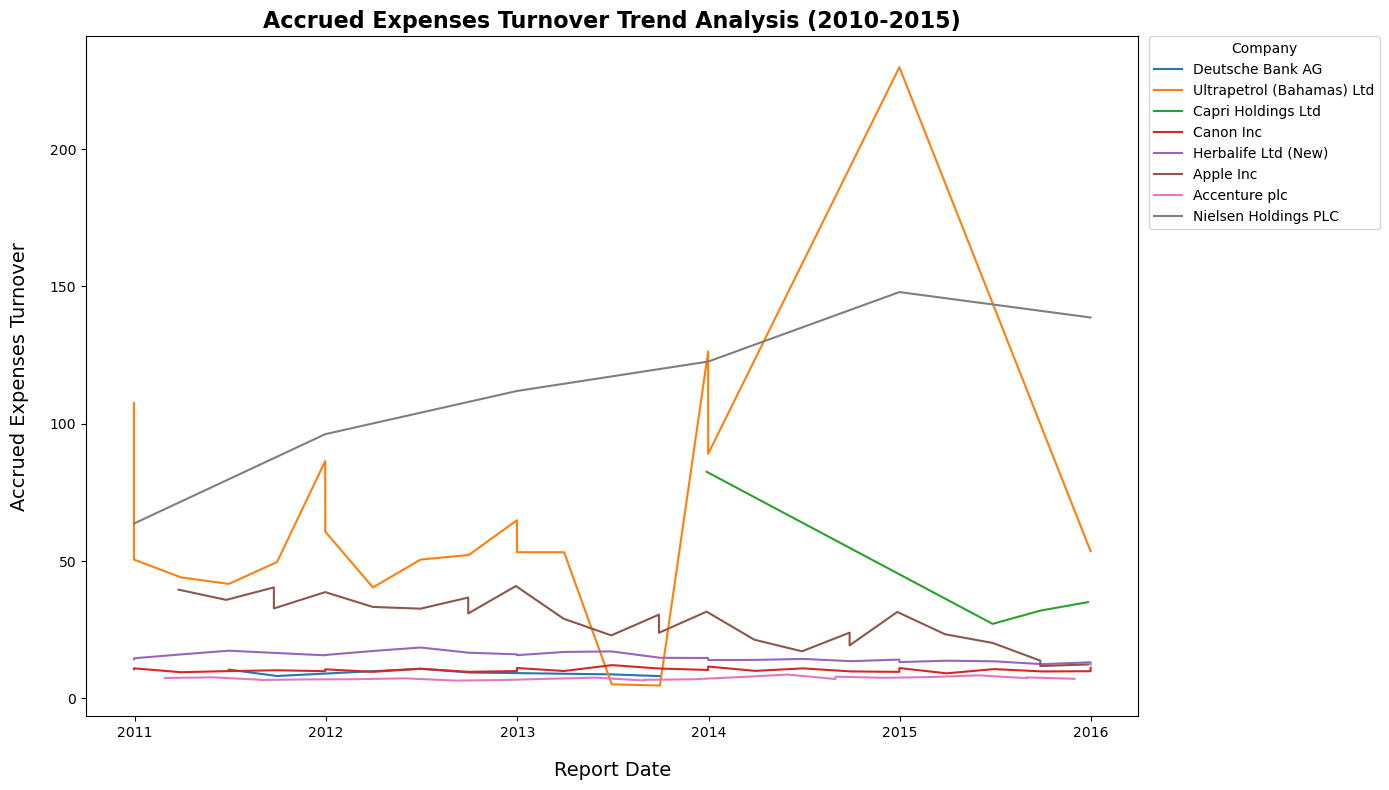

In [16]:
# Loop through each unique company name in the DataFrame to plot each company's trend separately
plt.figure(figsize=(14, 8))  # Define the figure size for clarity in visualization

for company in relevant_data['company_name'].unique():
    # Filter data for the current company in the loop
    company_data = relevant_data[relevant_data['company_name'] == company]

    # Plot the trend for the current company
    plt.plot(
        company_data['report_date'],  # X-axis: Report date
        company_data['amount'],       # Y-axis: Financial metric value (e.g., Accrued Expenses Turnover)
        label=company                 # Label each line with the company name for legend reference
    )

# Add a legend to the plot to identify each company's line
plt.legend(
    title='Company',               # Title for the legend
    bbox_to_anchor=(1.003, 1.01),      # Position the legend outside the plot (to the right)
    loc='upper left'               # Anchor the upper-left corner of the legend box to the coordinates
)

# Add title and labels to the plot for context
plt.title("Accrued Expenses Turnover Trend Analysis (2010-2015)", weight = 'bold', fontsize = 16)
plt.xlabel("Report Date", fontsize = 14, labelpad = 15)
plt.ylabel("Accrued Expenses Turnover", fontsize = 14, labelpad = 15)

# Display the plot
plt.tight_layout()  # Adjust layout for better fit of plot and legend
plt.show()

## Accrued Expenses Turnover Trend Analysis (2010-2015)

Based on the line chart of accrued expenses turnover for selected companies, the following can be observed regarding trends:

1. **Ultrapetrol (Bahamas) Ltd**:  
   - Ultrapetrol has the highest volatility and spread in terms of accrued expenses turnover. It notably spikes quite high in 2014, topping well above 200, which is far higher than any other company.
   - This might indicate that Ultrapetrol experienced unique events or variations in cash and expense buildups, causing its turnover ratio to fluctuate wildly.

2. **Nielsen Holdings PLC**:  
   - Nielsen shows a consistent upward trajectory from roughly 2011 to 2015, with its accrued expenses turnover reaching almost 150 at the end of the period.
   - This steady increase could reflect an improvement in cash flow management and operational efficiencies observed over time.

3. **Capri Holdings Ltd**:  
   - Capri shows a slight decrease in turnover from about 2014 to 2015.
   - Although its turnover values are lower compared to Ultrapetrol or Nielsen, the downward trend might signal that the company is facing increasing challenges in managing accrued expenses or shifts in operational efficiency.

4. **Other Companies (Deutsche Bank AG, Canon Inc, Herbalife Ltd (New), Apple Inc, Accenture plc)**:  
   - The remaining companies have low and stable accrued expenses turnover values, generally below 50 throughout the period.
   - This stability suggests a more consistent approach to managing accrued expenses, with fewer extreme fluctuations in cash flow efficiency. These companies appear more conservative in their financial operations, with fewer significant changes during the period.

### Summary
Ultrapetrol and Nielsen Holdings represent the most volatile and high-ranking companies in accrued expenses turnover. Ultrapetrol’s large peaks may indicate more aggressive financial management or unique industry pressures, while Nielsen’s steady increase suggests consistent improvement over time. In contrast, the remaining companies display more stable financial behavior, with lower turnover values reflecting steadier cash flow management. 
This analysis could lead to further investigation into why some companies have higher volatility in financial metrics than others, potentially indicating different financial management strategies and operational efficiencies.

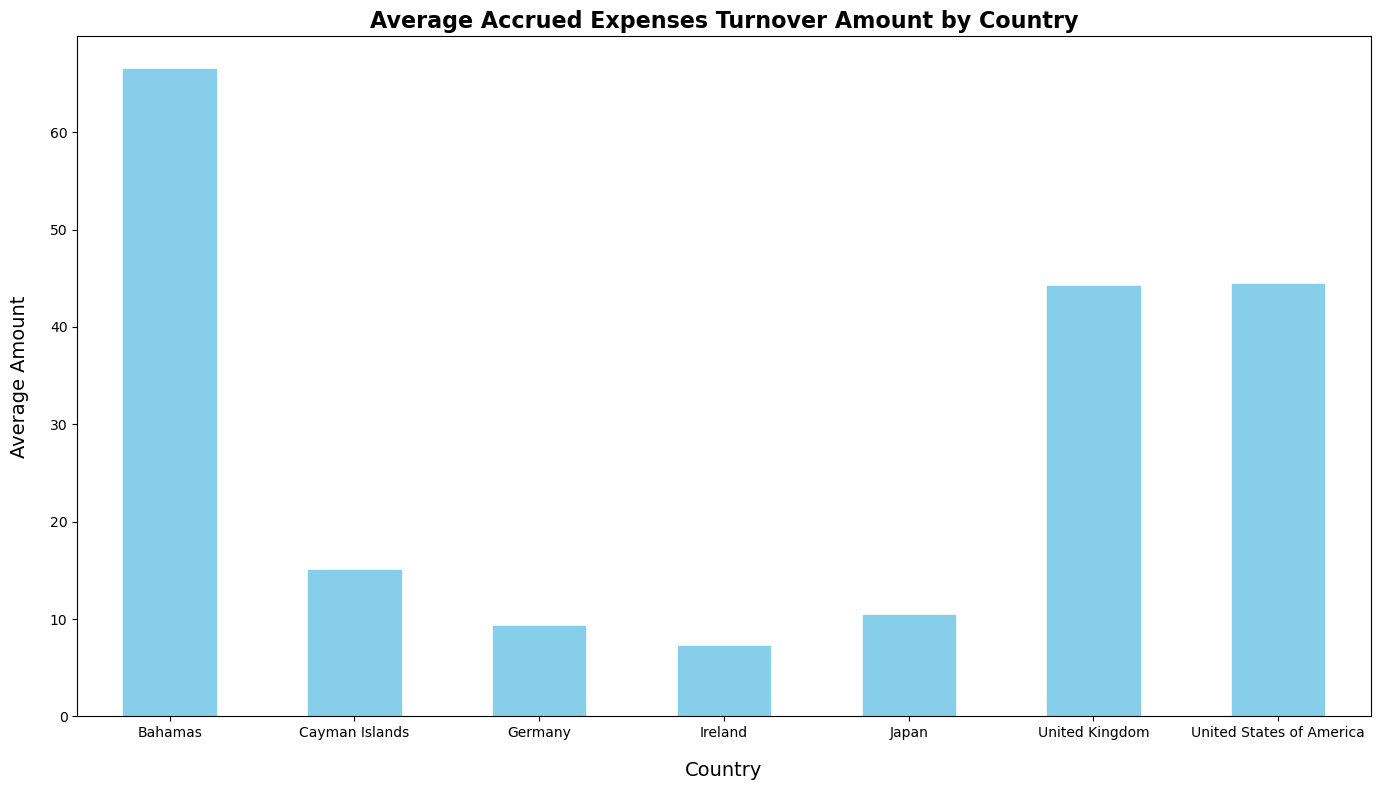

In [18]:
# Group the data by 'country_name' and calculate the average 'amount' for each country.
country_avg = aet_df.groupby('country')['amount'].mean()

# Define the figure size for clarity in visualization
plt.figure(figsize=(14, 8))

# Plot the results in a bar chart.
country_avg.plot(
    kind='bar', 
    color='skyblue', 
    edgecolor='skyblue'
)

# Add title and labels for x-axis and y-axis.
plt.title("Average Accrued Expenses Turnover Amount by Country", weight = 'bold', fontsize = 16)
plt.xlabel("Country", fontsize = 14, labelpad = 15)
plt.ylabel("Average Amount", fontsize = 14, labelpad = 15)

# Rotate x-axis labels for better readability.
plt.xticks(rotation=0)

# Optimize layout for improved appearance.
plt.tight_layout()
plt.show()

## Analysis of Average Accrued Expenses Turnover by Country

The bar chart displays the average financial metric (in this case, `Accrued Expenses Turnover`) across different countries, revealing disparities in regional financial performance. Here’s a breakdown of the results:

1. **Bahamas**:
   - With an average financial amount of **66.52**, the Bahamas stands out as the top-performing country among those listed. This high value indicates strong financial activity or potentially more significant revenue streams among the analyzed companies based in the Bahamas.

2. **United States of America and United Kingdom**:
   - The United States and the United Kingdom follow, with averages of **44.38** and **44.17**, respectively. These two countries show similar levels of the financial metric, highlighting them as other strong contributors to the overall financial performance. Given that both nations have robust economies and diverse markets, their metrics may reflect a high level of business activity and efficient financial management.

3. **Cayman Islands**:
   - The Cayman Islands has a moderate average amount of **15.06**. This value may reflect specific industry characteristics, as the Cayman Islands is known for its financial services sector, including offshore banking and investment funds. The lower average compared to the Bahamas might indicate a different scale or nature of financial operations.

4. **Japan**:
   - Japan’s average is **10.38**, suggesting relatively stable but lower levels of the financial metric compared to other major economies like the United States and the United Kingdom. This value may reflect the unique business environment in Japan, where companies often emphasize long-term stability over short-term financial gains.

5. **Germany**:
   - Germany’s average amount is **9.29**, slightly lower than Japan’s. As one of the largest economies in Europe, Germany’s result could indicate a conservative approach in certain sectors or lower profit margins in the analyzed data sample. Germany’s relatively modest performance may also reflect specific market conditions or the sample of companies analyzed.

6. **Ireland**:
   - Ireland has the lowest average amount, at **7.26**. While Ireland is home to many multinational companies, particularly in the tech and pharmaceutical industries, this lower value could indicate smaller financial operations or specific market factors affecting the companies in the sample.

### Summary

The results show considerable variation in the average financial metric across different countries. The Bahamas, United States, and United Kingdom lead in terms of financial performance, which may reflect favorable business environments or higher revenue opportunities in these regions. Meanwhile, countries like Germany and Ireland exhibit lower averages, which could be attributed to specific economic conditions, industry characteristics, or company strategies.

This analysis provides insights into regional performance and can help guide future financial decisions, such as focusing investment in high-performing regions or exploring growth opportunities in lower-performing markets.

## Indicator Analysis Across Key Financial Categories

In this section of the analysis, I am focusing on the most valuable indicators within five primary financial categories: **Profitability**, **Liquidity**, **Efficiency**, **Leverage**, and **Growth**. Each category provides insights into different aspects of a company’s financial health and operational effectiveness, and by analyzing these indicators, I can gain a comprehensive understanding of performance across companies.

### Selected Indicators by Category

1. **Profitability Indicators**: These metrics highlight the core earnings capability and operational efficiency of each company. The selected indicators for this category include:
   - **EBITDA**: Provides insight into core operating profitability.
   - **Net Income**: Shows bottom-line profit after all expenses.
   - **Operating Margin**: Measures profitability from operations as a percentage of revenue.

2. **Liquidity Indicators**: Liquidity metrics assess a company’s ability to meet its short-term obligations. For this analysis, I am using:
   - **Current Ratio**: Assesses the company’s capacity to cover short-term liabilities.
   - **Quick Ratio**: Similar to Current Ratio but excludes inventory, giving a stricter measure of liquidity.
   - **Cash From Operations**: Highlights cash flow generated from core business activities.

3. **Efficiency Indicators**: These metrics focus on how effectively a company utilizes its assets and manages its operational processes. The chosen indicators are:
   - **Total Asset Turnover**: Reflects how well assets are used to generate revenue.
   - **Inventory Turnover**: Indicates inventory management efficiency.
   - **Accounts Payable Turnover**: Provides insight into how quickly the company pays suppliers.

4. **Leverage Indicators**: Leverage metrics help us understand a company’s financial structure and debt reliance. Selected indicators are:
   - **Total Debt to Equity**: Shows the degree of financial leverage.
   - **Interest Coverage**: Measures the company’s ability to cover interest payments.
   - **Long Term Debt to Equity**: Offers insights into reliance on long-term debt.

5. **Growth Indicators**: Growth indicators show the company’s ability to expand and generate returns. I will focus on:
   - **Total Revenue**: Highlights top-line growth over time.
   - **Return on Equity (ROE)**: Shows profitability relative to shareholders’ equity.
   - **Return on Assets (ROA)**: Measures efficiency in using assets to generate profit.

In [22]:
# Selecting relevant indicators for each category
profitability_indicators = ['EBITDA', 'Net Income', 'Operating Margin']
liquidity_indicators = ['Current Ratio', 'Quick Ratio', 'Cash From Operations']
efficiency_indicators = ['Total Asset Turnover', 'Inventory Turnover', 'Accounts Payable Turnover']
leverage_indicators = ['Total Debt to Equity', 'Interest Coverage', 'Long Term Debt to Equity']
growth_indicators = ['Total Revenue', 'Return on Equity', 'Return on Assets']

# Filtering data by indicator and creating separate DataFrames
profitability_df = df_filtered[df_filtered['indicator'].isin(profitability_indicators)]
liquidity_df = df_filtered[df_filtered['indicator'].isin(liquidity_indicators)]
efficiency_df = df_filtered[df_filtered['indicator'].isin(efficiency_indicators)]
leverage_df = df_filtered[df_filtered['indicator'].isin(leverage_indicators)]
growth_df = df_filtered[df_filtered['indicator'].isin(growth_indicators)]

## Profitability Indicators Analysis

In [24]:
# Filter relevant columns for profitability_df and pivot the data so that each of the indicators becomes a separate column
profitability_data = profitability_df[['company_name', 'country', 'report_date', 'indicator', 'amount']]
profitability_data_pivoted = profitability_data.pivot_table(
    index=['company_name', 'country', 'report_date'],    # Group by company, country, and date
    columns='indicator',                                 # Spread the indicator values into separate columns
    values='amount',                                     # Values to aggregate in the pivot table
    aggfunc='mean'                                       # Average any duplicates by date if they exist
).reset_index()

# Rename columns for readability
profitability_data_pivoted.columns.name = None
profitability_data_pivoted.rename(columns={
    'EBITDA': 'ebitda',
    'Net Income': 'net_income',
    'Operating Margin': 'operating_margin'
}, inplace=True)

# Remove companies containing outliers
profitability_data_pivoted = profitability_data_pivoted[~profitability_data_pivoted['company_name'].isin(
    [
        'PT Telekomunikasi Indonesia (Persero) TBK',
        'Immutep Ltd',
        'Tata Motors Ltd'
    ]
)]
                                                                                                         
# Display the result
profitability_data_pivoted.head()

,company_name,country,report_date,ebitda,net_income,operating_margin
0,Accenture plc,Ireland,2011-02-28,888845000.00,503017000.00,11.88
1,Accenture plc,Ireland,2011-05-31,1081588000.00,628013000.00,13.18
2,Accenture plc,Ireland,2011-08-31,2426110000.00,1444805000.00,12.77
3,Accenture plc,Ireland,2011-11-30,1119298000.00,642086000.00,12.93
4,Accenture plc,Ireland,2012-02-29,1040524000.00,643923000.00,12.25


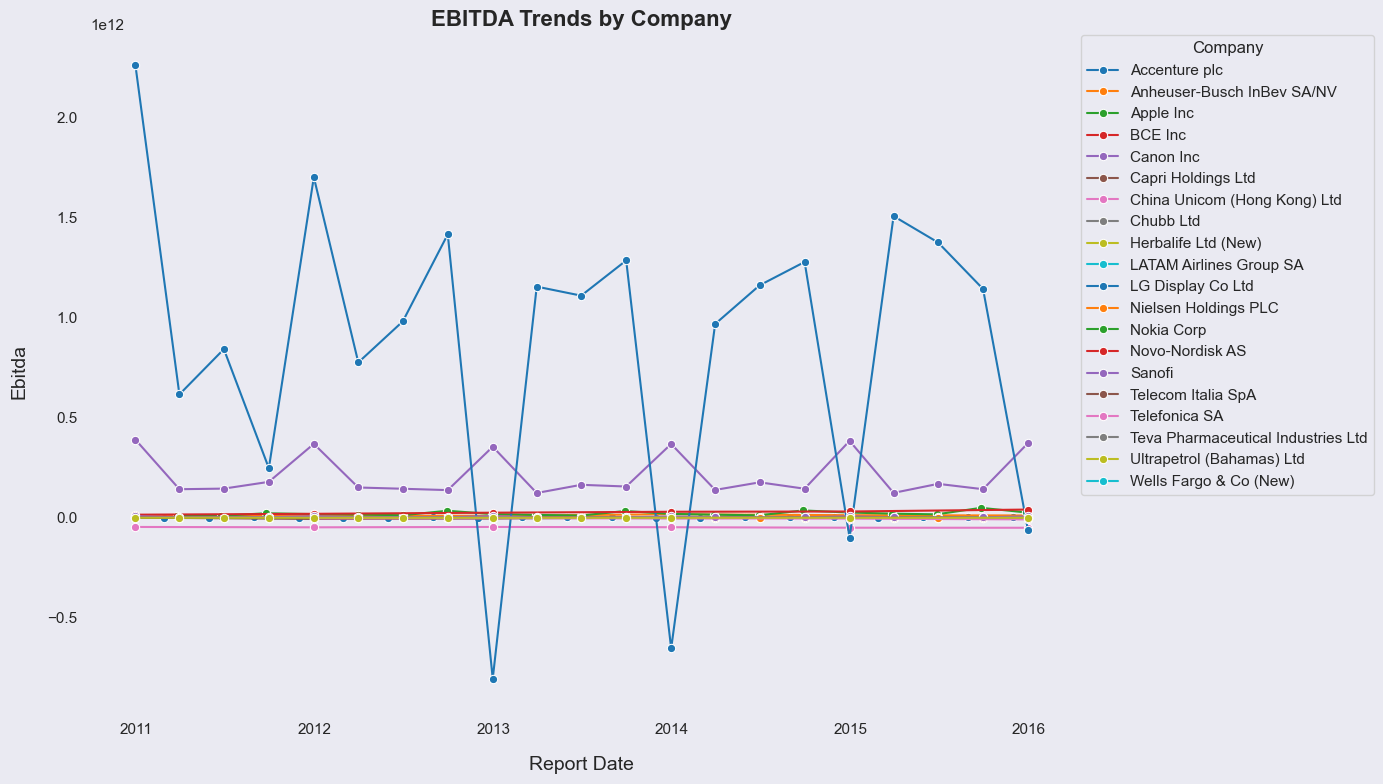

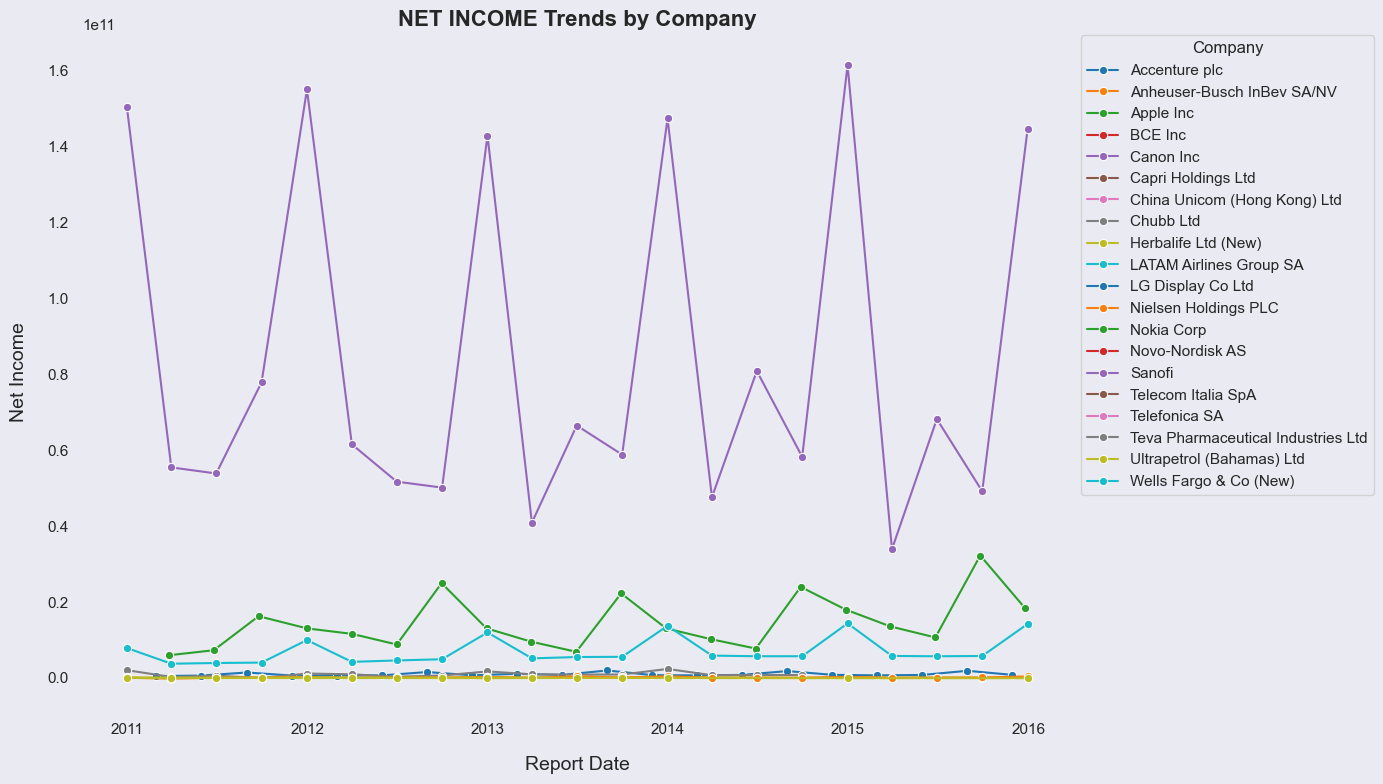

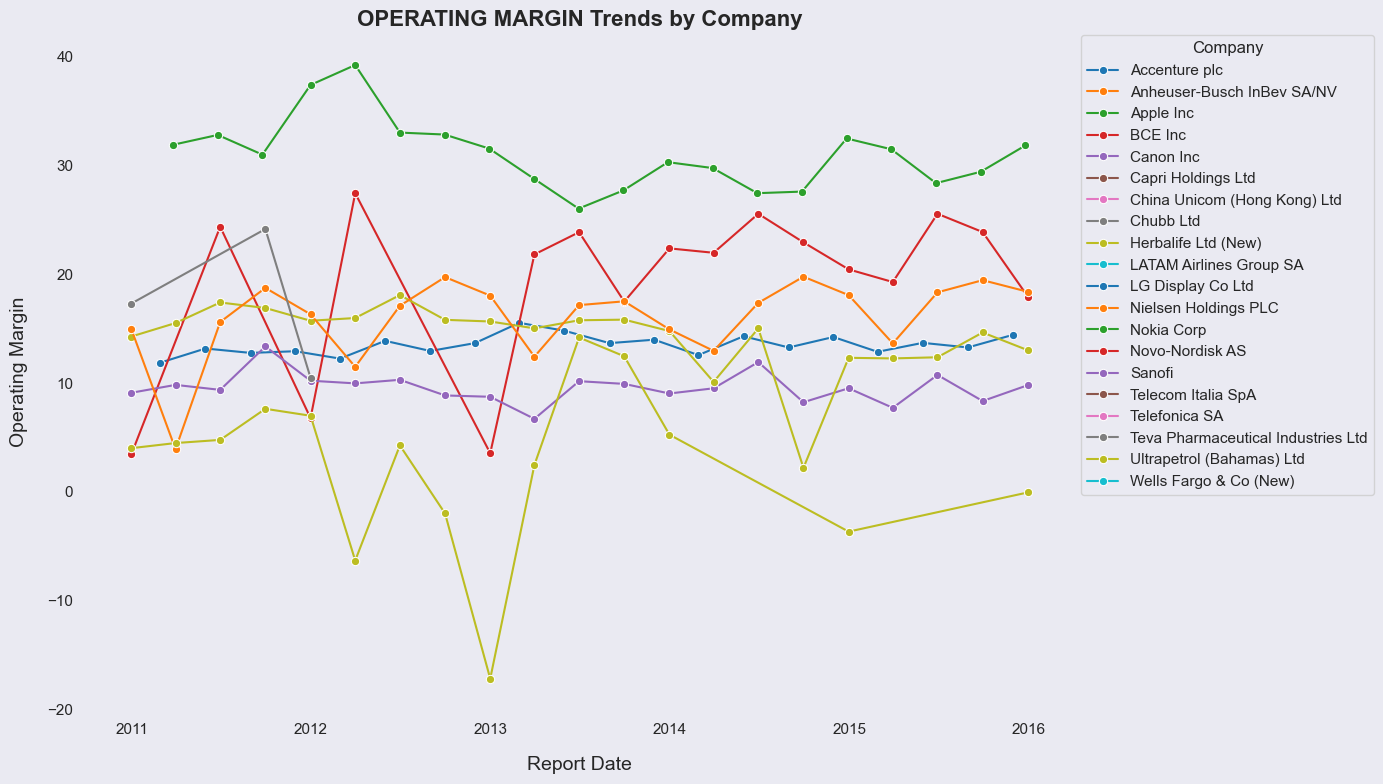

In [25]:
import seaborn as sns

# Set plot style for consistency
sns.set_theme(style='dark')

# Loop through each profitability indicator for analysis and visualization
for indicator in ['ebitda', 'net_income', 'operating_margin']:
    plt.figure(figsize=(14, 8), facecolor='#EAEAF2')
    sns.lineplot(
        data=profitability_data_pivoted,
        x='report_date', y=indicator, hue='company_name',
        marker='o', linewidth=1.5, palette="tab10"
    )
    plt.title(f"{indicator.replace('_', ' ').title().upper()} Trends by Company", fontsize = 16, weight = 'bold')
    plt.xlabel("Report Date", fontsize = 14, labelpad = 14)
    plt.ylabel(indicator.replace('_', ' ').title(), fontsize = 14, labelpad = 14)
    plt.legend(bbox_to_anchor=(1.001, 1.01), loc='upper left', title="Company")
    plt.xticks(rotation=0)
    sns.despine(bottom=True, left=True)
    plt.tight_layout()
    plt.show()

## Profitability Indicators - Detailed Analysis

### EBITDA Trends:

- **High and Growing EBITDA:** Companies with a consistent upward trend in EBITDA are likely expanding their operations or increasing operational efficiencies. This is a positive sign, indicating scalability without a proportional increase in costs.
- **Seasonal Patterns:** If some companies show fluctuating EBITDA patterns, especially if they peak or dip during the same periods each year, this may suggest seasonality in revenue or expenses, relevant for budgeting and resource allocation.

### Net Income:

- **Declining Net Income:** Any downtrend in Net Income while EBITDA remains stable may indicate rising non-operational expenses, such as interest payments or taxes. This calls for a closer look at financing or taxation strategies.
- **Surges in Net Income:** Large, sudden increases in Net Income might suggest non-recurring income (e.g., asset sales or tax breaks), which can artificially inflate profitability in certain periods.

### Operating Margin:

- **High Operating Margins:** Companies maintaining high operating margins are usually efficient in managing operating costs. These businesses are typically more resilient during economic downturns since they have more control over cost structures.
- **Volatile Operating Margins:** If some companies have fluctuating margins, it could reflect exposure to variable costs (like raw materials or labor), which may be sector-dependent. Monitoring these fluctuations can help assess sensitivity to cost changes and potential need for long-term supplier contracts.

## Liquidity Indicators Analysis

In [28]:
# Filter relevant columns for liquidity_df and pivot
liquidity_data = liquidity_df[['company_name', 'country', 'report_date', 'indicator', 'amount']]
liquidity_data_pivoted = liquidity_data.pivot_table(
    index=['company_name', 'country', 'report_date'],
    columns='indicator',
    values='amount',
    aggfunc='mean'
).reset_index()

# Rename columns for readability
liquidity_data_pivoted.columns.name = None
liquidity_data_pivoted.rename(columns={
    'Current Ratio': 'current_ratio',
    'Quick Ratio': 'quick_ratio',
    'Cash From Operations': 'cash_from_operations'
}, inplace=True)

# Remove companies containing outliers
liquidity_data_pivoted = liquidity_data_pivoted[~liquidity_data_pivoted['company_name'].isin(
    [
        'Immutep Ltd'
    ]
)]

# Display the result
liquidity_data_pivoted.head()

,company_name,country,report_date,cash_from_operations,current_ratio,quick_ratio
0,Accenture plc,Ireland,2011-02-28,601104000.00,1.55,1.38
1,Accenture plc,Ireland,2011-05-31,1352960000.00,1.51,1.35
2,Accenture plc,Ireland,2011-08-31,2411507500.00,1.45,1.31
3,Accenture plc,Ireland,2011-11-30,475258000.00,1.45,1.31
4,Accenture plc,Ireland,2012-02-29,857813000.00,1.53,1.37


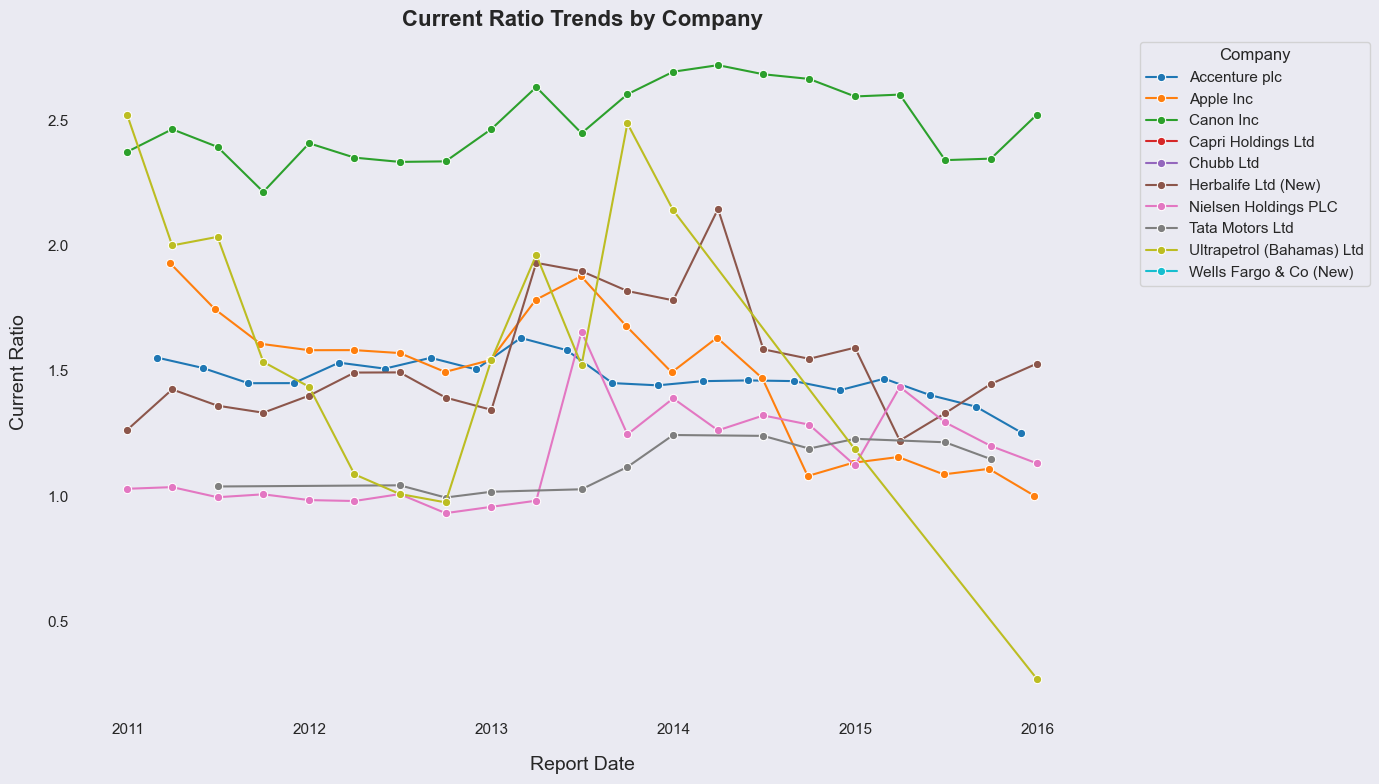

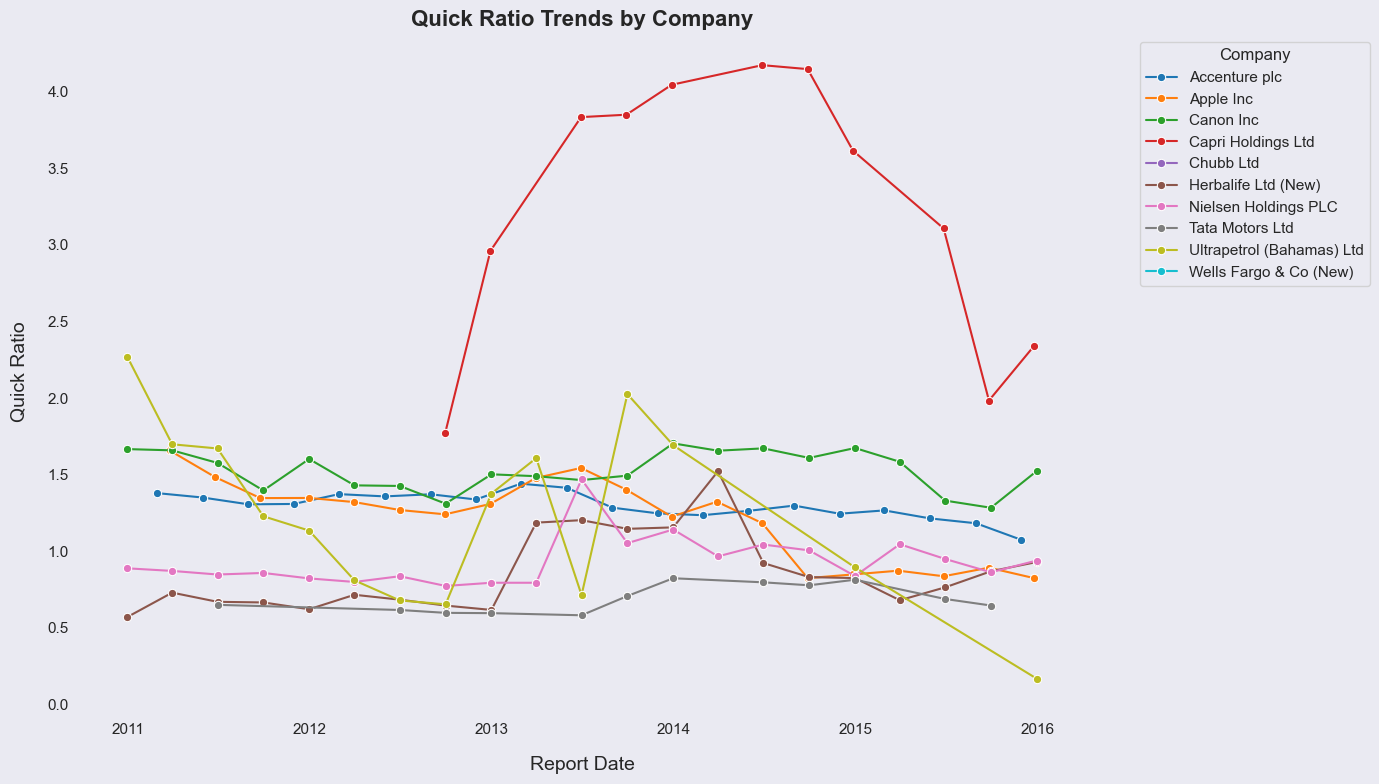

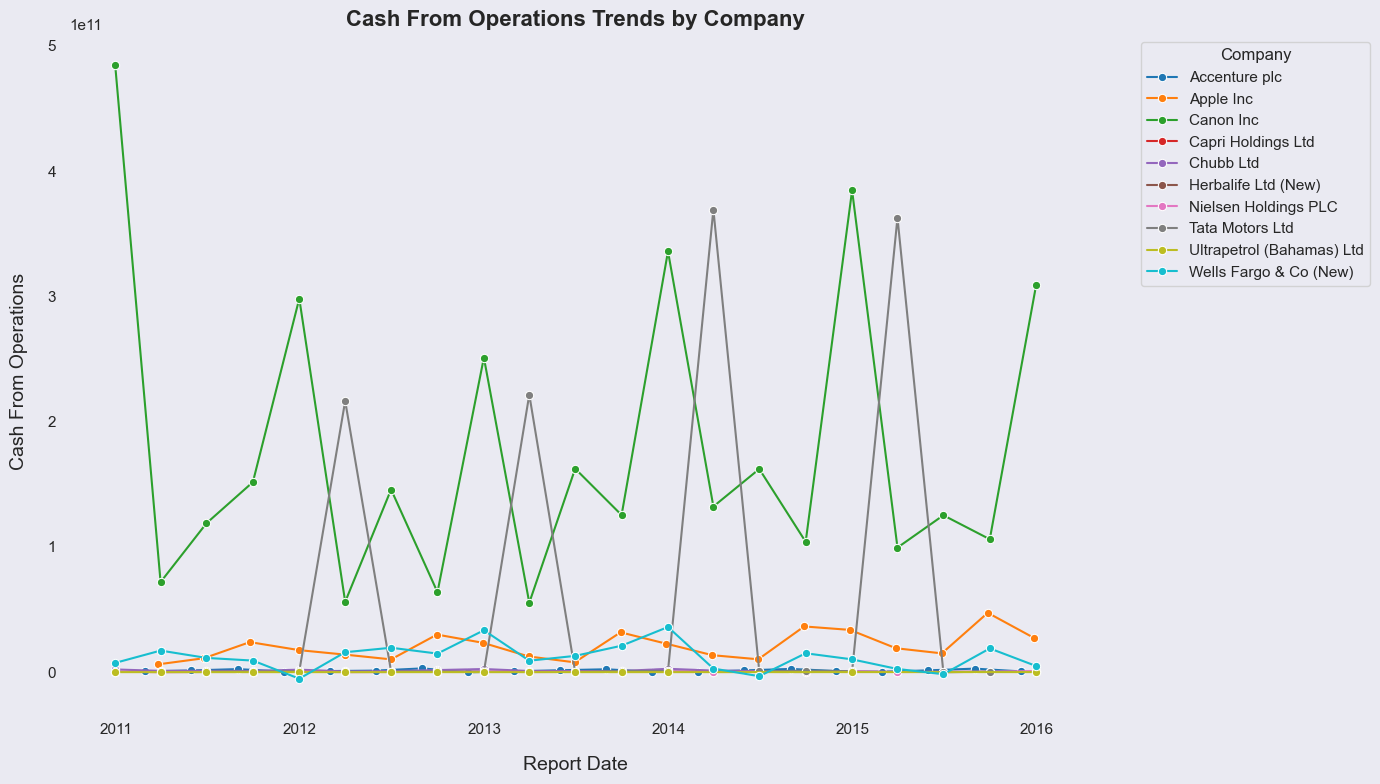

In [29]:
# Set plot style for consistency
sns.set_theme(style='dark')

# Loop through each liquidity indicator for analysis and visualization
for indicator in ['current_ratio', 'quick_ratio', 'cash_from_operations']:
    plt.figure(figsize=(14, 8), facecolor='#EAEAF2')
    sns.lineplot(
        data=liquidity_data_pivoted,
        x='report_date', y=indicator, hue='company_name',
        marker='o', linewidth=1.5, palette="tab10"
    )
    plt.title(f"{indicator.replace('_', ' ').title()} Trends by Company", fontsize = 16, weight = 'bold')
    plt.xlabel("Report Date", fontsize = 14, labelpad = 14)
    plt.ylabel(indicator.replace('_', ' ').title(), fontsize = 14, labelpad = 14)
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title="Company")
    plt.xticks(rotation=0)
    sns.despine(bottom=True, left=True)
    plt.tight_layout()
    plt.show()

## Liquidity Indicators - Detailed Analysis

### Current Ratio:

- **High but Stable Current Ratios**: Companies with consistently high Current Ratios (e.g., 1.5–2.5) likely have a good balance of short-term assets and liabilities, essential for operational stability. However, excessively high values (over 3) could mean they aren’t fully utilizing their resources to drive growth.
  
- **Low Current Ratios**: Ratios consistently below 1 can indicate potential liquidity issues, suggesting these companies may struggle to cover short-term obligations. This might warrant further investigation into cash flow issues or increased reliance on short-term debt.

### Quick Ratio:

- **Conservative Liquidity**: A high Quick Ratio (close to or exceeding 1) reflects strong liquidity even without relying on inventory. Industries where inventory isn’t highly liquid (e.g., machinery) should aim for higher Quick Ratios.

- **Dips in Quick Ratio**: If the Quick Ratio dips suddenly, it could indicate inventory buildup, which may be risky for sectors sensitive to obsolescence. This data can help identify companies needing better inventory management or more liquid assets.

### Cash From Operations:

- **Positive and Growing Cash Flow**: Consistent, positive trends in Cash From Operations indicate robust, self-sustaining business models. Companies with such trends can potentially self-fund growth without significant debt.
  
- **Negative Cash Flow**: Persistent negative Cash Flow from Operations suggests operational inefficiencies or cash flow management issues. This trend could also indicate aggressive expansion with associated costs, common in startups or rapidly scaling companies.

## Efficiency Indicators Analysis

In [32]:
# Filter relevant columns for efficiency_df and pivot
efficiency_data = efficiency_df[['company_name', 'country', 'report_date', 'indicator', 'amount']]
efficiency_data_pivoted = efficiency_data.pivot_table(
    index=['company_name', 'country', 'report_date'],
    columns='indicator',
    values='amount',
    aggfunc='mean'
).reset_index()

# Rename columns for readability
efficiency_data_pivoted.columns.name = None
efficiency_data_pivoted.rename(columns={
    'Total Asset Turnover': 'total_asset_turnover',
    'Inventory Turnover': 'inventory_turnover',
    'Accounts Payable Turnover': 'accounts_payable_turnover'
}, inplace=True)

# Remove companies containing outliers
efficiency_data_pivoted = efficiency_data_pivoted[~efficiency_data_pivoted['company_name'].isin(
    [
        'Tata Motors Ltd'
    ]
)]

# Display the result
efficiency_data_pivoted.head()

,company_name,country,report_date,accounts_payable_turnover,inventory_turnover,total_asset_turnover
0,Accenture plc,Ireland,2011-02-28,31.54,NaN,1.97
1,Accenture plc,Ireland,2011-05-31,33.45,NaN,1.99
2,Accenture plc,Ireland,2011-08-31,30.62,NaN,1.89
3,Accenture plc,Ireland,2011-11-30,32.95,NaN,1.96
4,Accenture plc,Ireland,2012-02-29,32.53,NaN,1.87


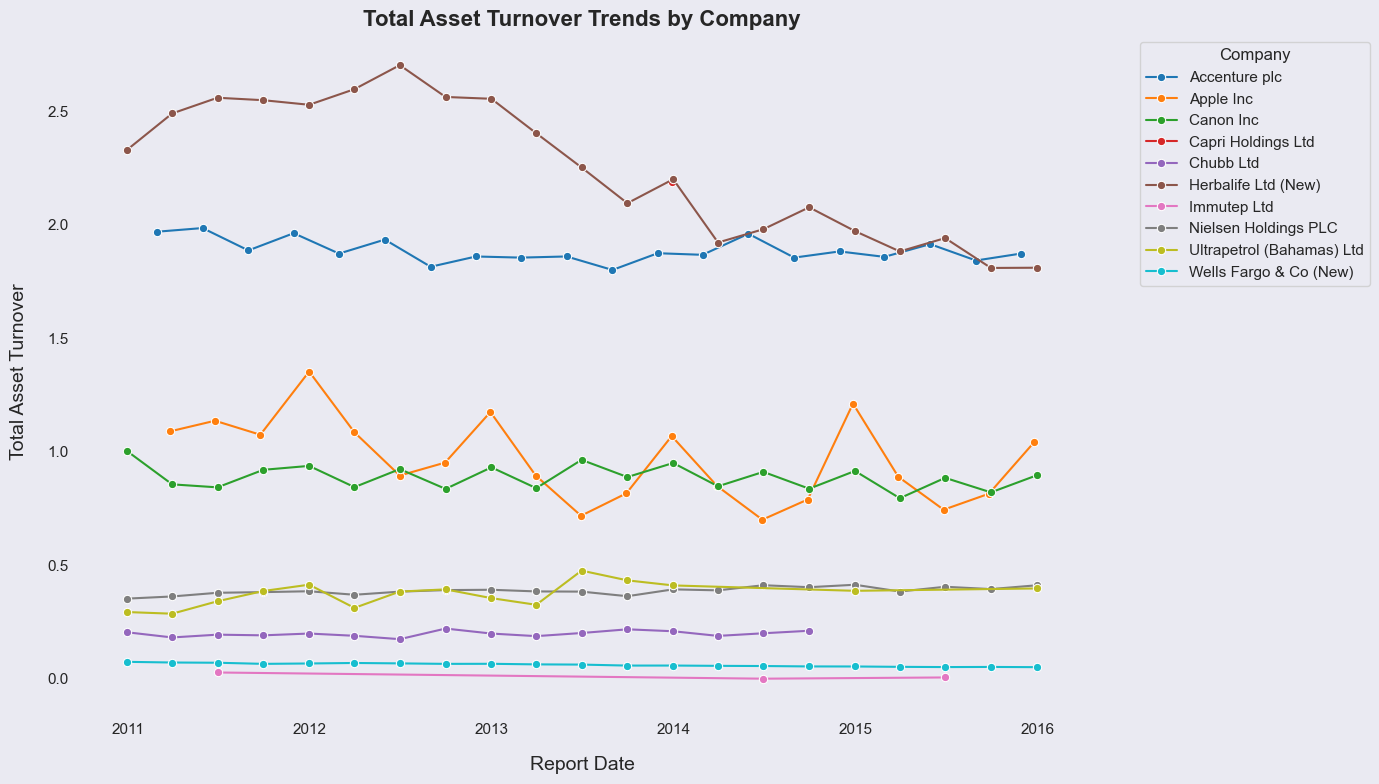

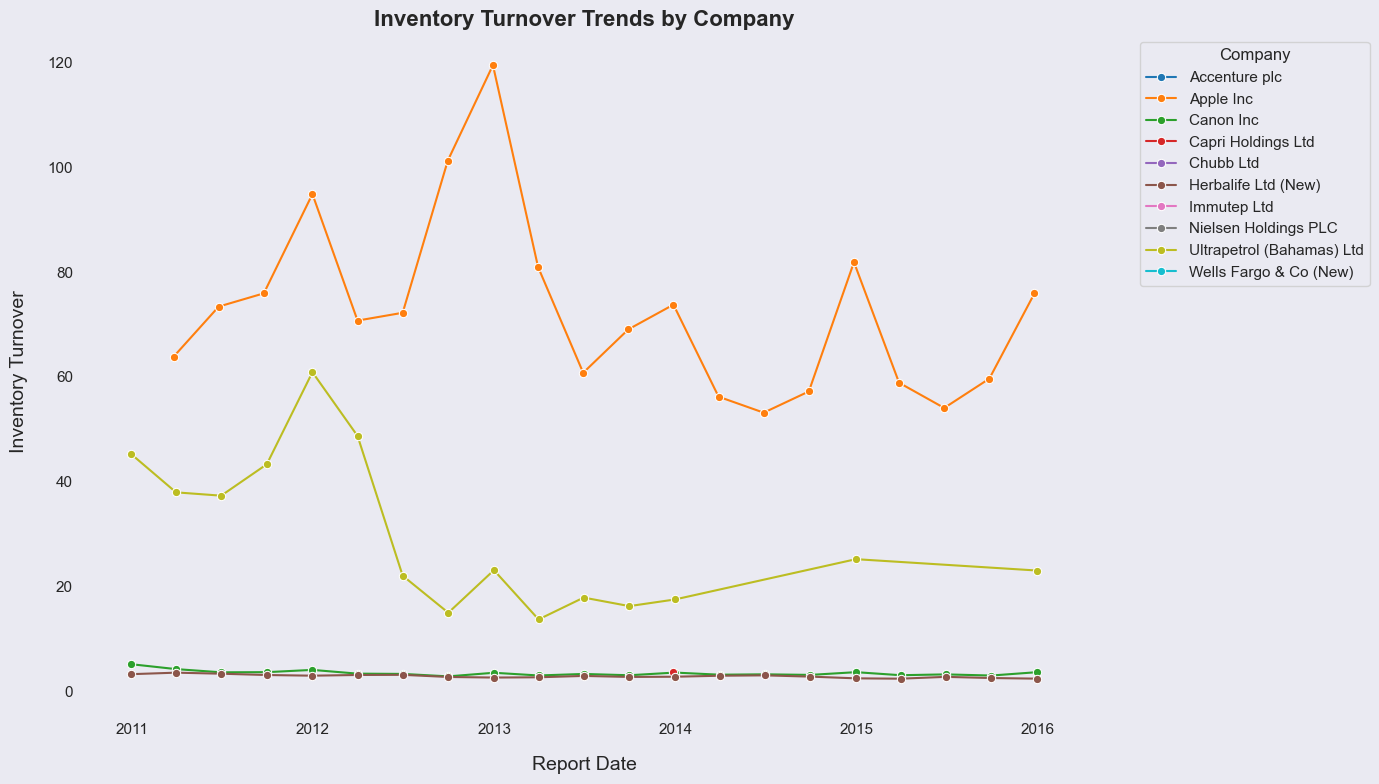

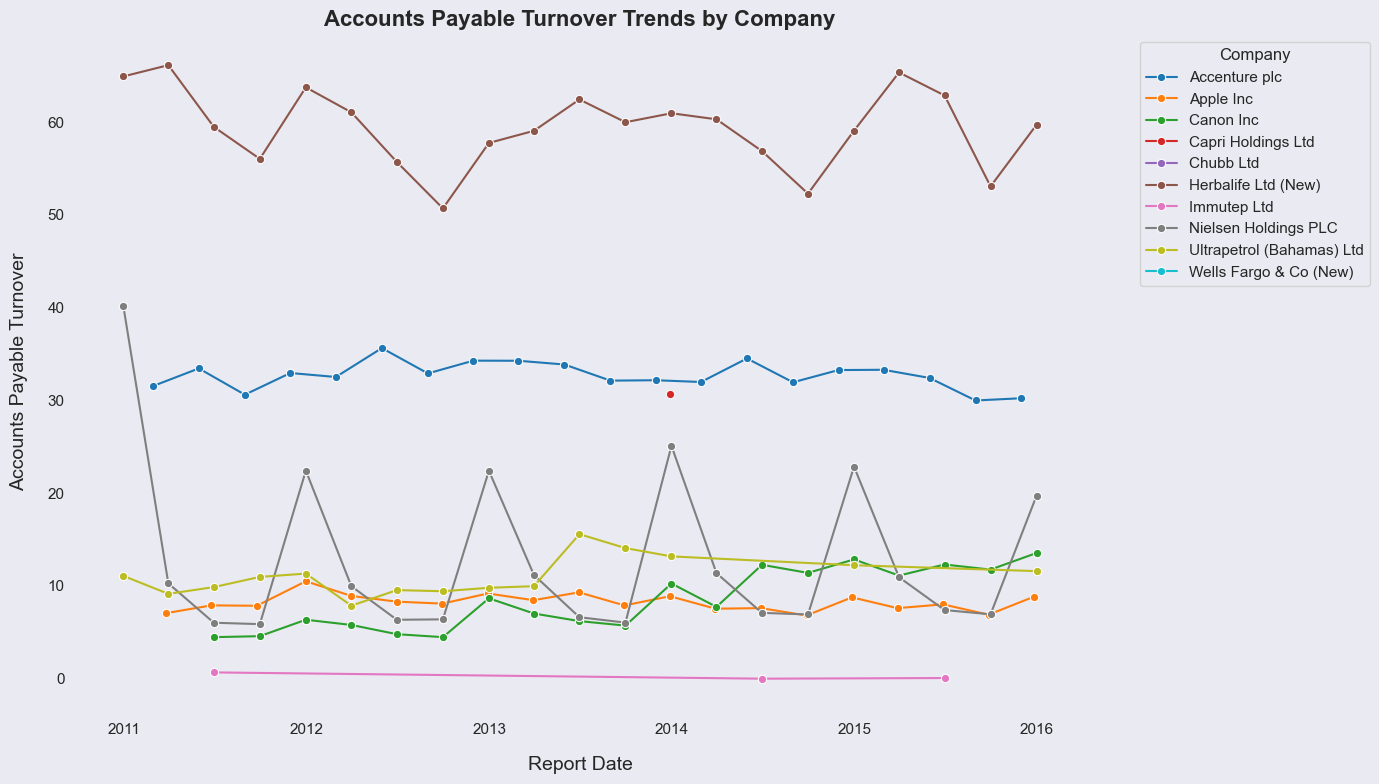

In [33]:
# Set plot style for consistency
sns.set_theme(style='dark')

# Loop through each efficiency indicator for analysis and visualization
for indicator in ['total_asset_turnover', 'inventory_turnover', 'accounts_payable_turnover']:
    plt.figure(figsize=(14, 8), facecolor='#EAEAF2')
    sns.lineplot(
        data=efficiency_data_pivoted,
        x='report_date', y=indicator, hue='company_name',
        marker='o', linewidth=1.5, palette="tab10"
    )
    plt.title(f"{indicator.replace('_', ' ').title()} Trends by Company", fontsize = 16, weight = 'bold')
    plt.xlabel("Report Date", fontsize = 14, labelpad = 14)
    plt.ylabel(indicator.replace('_', ' ').title(), fontsize = 14, labelpad = 14)
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title="Company")
    plt.xticks(rotation=0)
    sns.despine(bottom=True, left=True)
    plt.tight_layout()
    plt.show()

## Efficiency Indicators - Detailed Analysis

### Total Asset Turnover:

- **High Asset Turnover**: Companies with high values efficiently utilize their assets to generate revenue, which is often seen in asset-light industries. This metric is key to evaluating return on investment in capital-intensive sectors.
  
- **Declining Trends**: A decline in this metric could indicate over-investment in assets without corresponding revenue growth, suggesting a need to optimize asset utilization or re-evaluate capital allocation.

### Inventory Turnover:

- **Fast Inventory Turnover**: High turnover indicates effective inventory management and responsiveness to demand. This is particularly important in retail or sectors with perishable goods, where slower turnover risks spoilage or obsolescence.
  
- **Low or Declining Inventory Turnover**: Companies with slower turnover rates may struggle with demand forecasting or have inefficient supply chains. Identifying this can help pinpoint areas for improvement, such as supplier contracts or demand forecasting models.

### Accounts Payable Turnover:

- **High Turnover Rates**: Companies paying suppliers quickly may have favorable cash flows or prioritize supplier relationships. However, overly high values could indicate missed opportunities for cash flow flexibility.
  
- **Low Accounts Payable Turnover**: A declining turnover ratio here can reflect deliberate delays in supplier payments, possibly as a cash flow strategy, but could also signal potential liquidity issues. Identifying these trends provides clues about cash retention strategies or financial strain.

## Leverage Indicators Analysis

In [36]:
# Filter relevant columns for leverage_df and pivot
leverage_data = leverage_df[['company_name', 'country', 'report_date', 'indicator', 'amount']]
leverage_data_pivoted = leverage_data.pivot_table(
    index=['company_name', 'country', 'report_date'],
    columns='indicator',
    values='amount',
    aggfunc='mean'
).reset_index()

# Rename columns for readability
leverage_data_pivoted.columns.name = None
leverage_data_pivoted.rename(columns={
    'Total Debt to Equity': 'total_debt_to_equity',
    'Interest Coverage': 'interest_coverage',
    'Long Term Debt to Equity': 'long_term_debt_to_equity'
}, inplace=True)

# Remove companies containing outliers
leverage_data_pivoted = leverage_data_pivoted[~leverage_data_pivoted['company_name'].isin(
    [
        'Herbalife Ltd (New)',
        'Tata Motors Ltd',
        'Apple Inc'
    ]
)]

# Display the result
leverage_data_pivoted.head()

,company_name,country,report_date,interest_coverage,long_term_debt_to_equity,total_debt_to_equity
0,Accenture plc,Ireland,2011-02-28,NaN,0.00,0.00
1,Accenture plc,Ireland,2011-05-31,NaN,NaN,0.00
2,Accenture plc,Ireland,2011-08-31,NaN,NaN,0.00
3,Accenture plc,Ireland,2011-11-30,NaN,0.00,0.00
4,Accenture plc,Ireland,2012-02-29,NaN,0.00,0.00


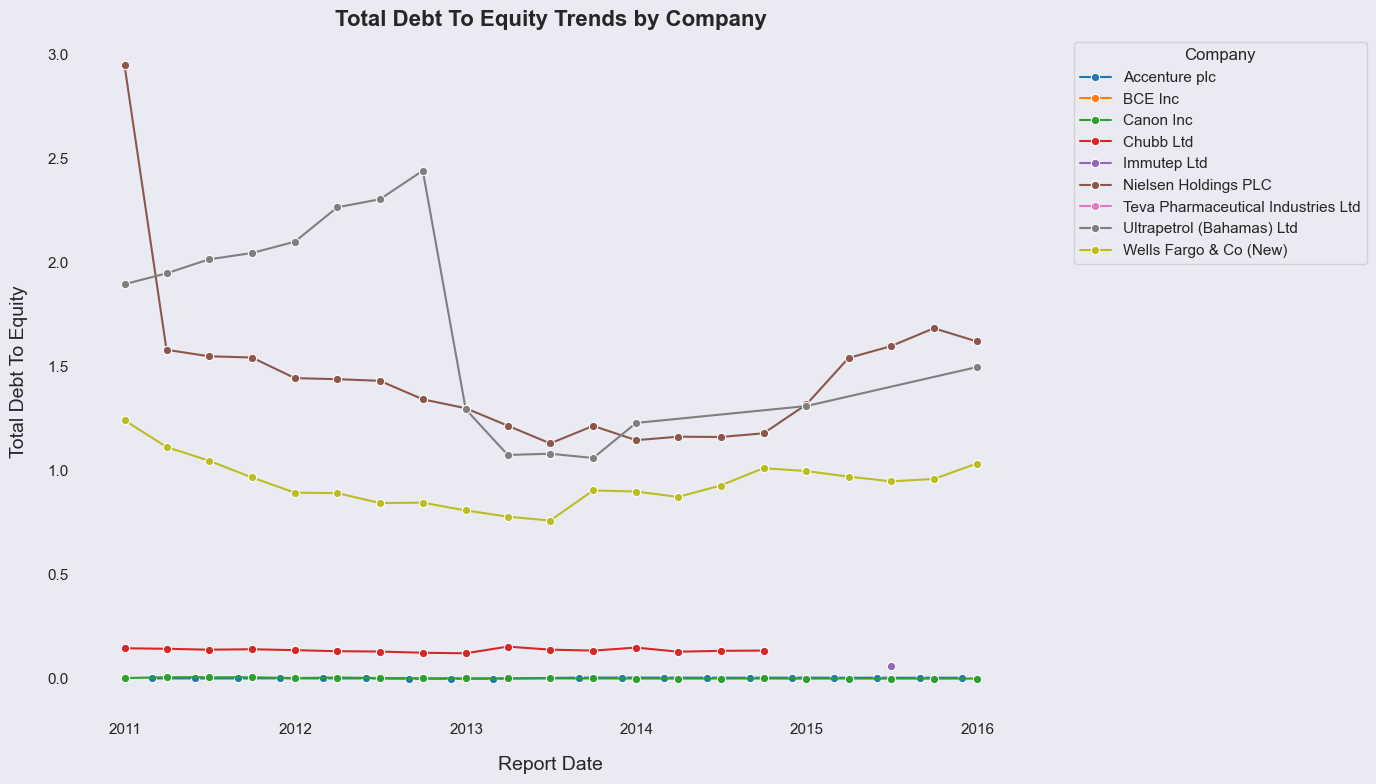

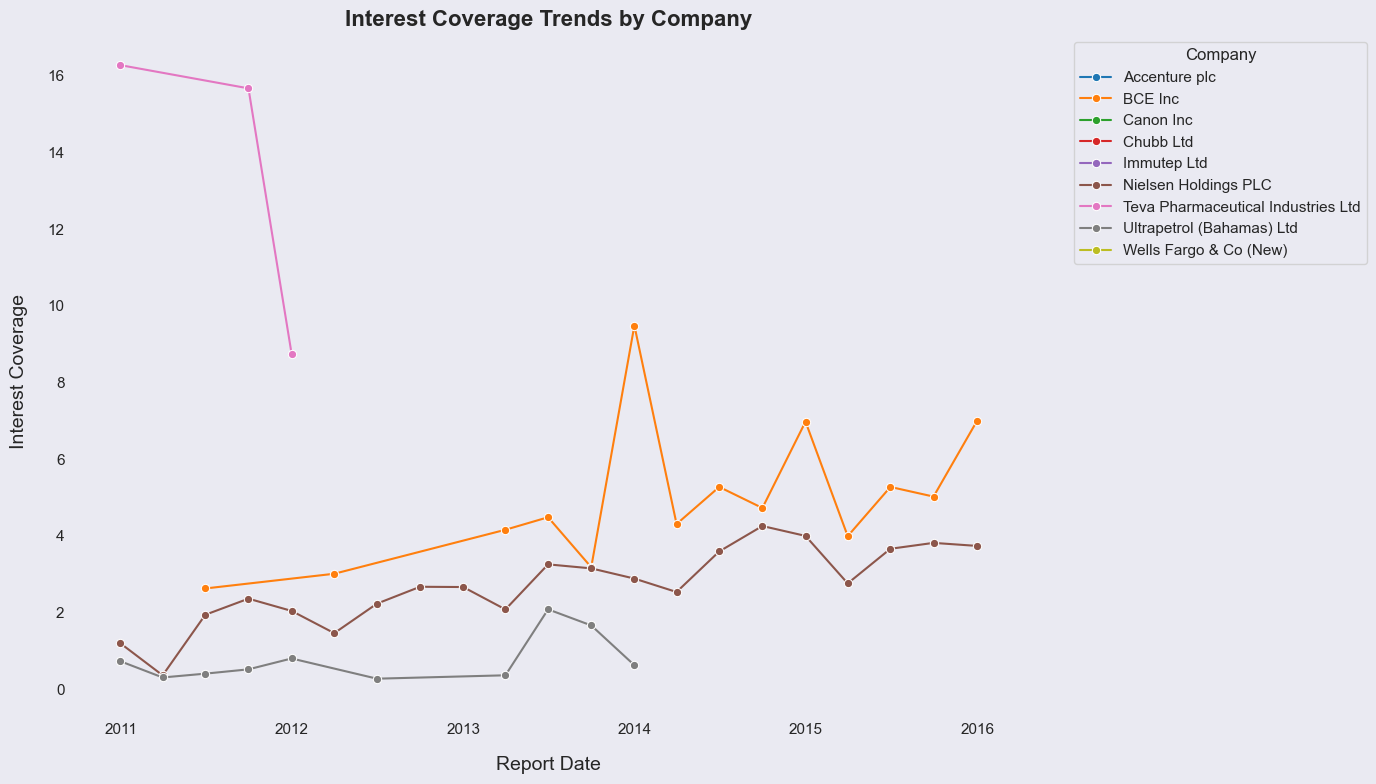

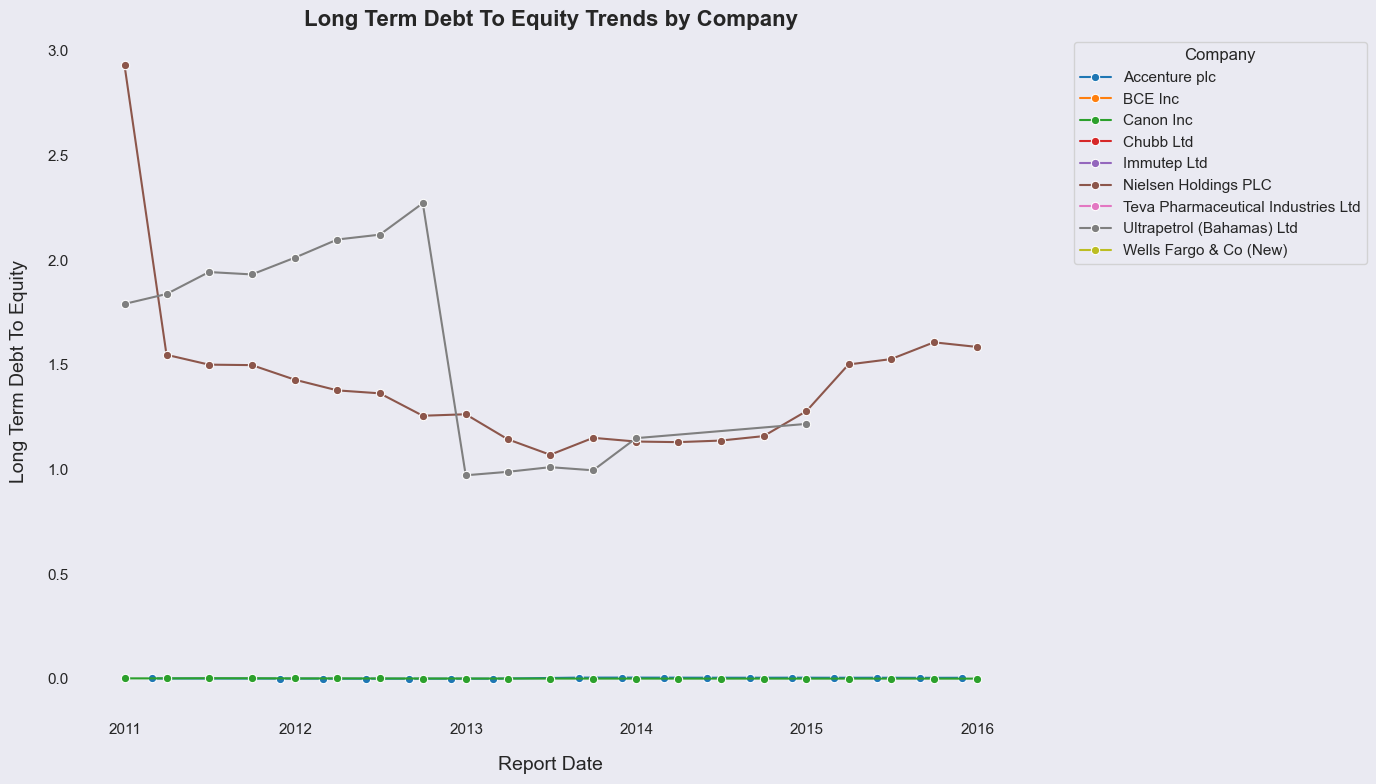

In [37]:
# Set plot style for consistency
sns.set_theme(style='dark')

# Loop through each leverage indicator for analysis and visualization
for indicator in ['total_debt_to_equity', 'interest_coverage', 'long_term_debt_to_equity']:
    plt.figure(figsize=(14, 8), facecolor='#EAEAF2')
    sns.lineplot(
        data=leverage_data_pivoted,
        x='report_date', y=indicator, hue='company_name',
        marker='o', linewidth=1.5, palette="tab10"
    )
    plt.title(f"{indicator.replace('_', ' ').title()} Trends by Company", fontsize = 16, weight = 'bold')
    plt.xlabel("Report Date", fontsize = 14, labelpad = 14)
    plt.ylabel(indicator.replace('_', ' ').title(), fontsize = 14, labelpad = 14)
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title="Company")
    plt.xticks(rotation=0)
    sns.despine(bottom=True, left=True)
    plt.tight_layout()
    plt.show()

## Leverage Indicators - Detailed Analysis

### Total Debt to Equity:

- **Increasing Ratios**: Rising Total Debt to Equity ratios may indicate growing reliance on debt for expansion, common among growth-oriented companies. This strategy comes with risk, so high ratios should be balanced by stable cash flow indicators.
  
- **Decreasing Ratios**: Declining ratios suggest a reduction in leverage, often a positive sign of debt repayment. It’s worth exploring whether this is due to active debt management or lower growth opportunities leading to conservative capital structuring.

### Interest Coverage:

- **High Coverage Ratios**: Ratios above 2 indicate strong interest-paying capacity, making these companies lower risk in terms of debt servicing. However, excessively high values can indicate under-utilization of cheap debt in expansion opportunities.
  
- **Declining Ratios**: If Interest Coverage is trending downward, companies may face rising debt-servicing costs relative to income, posing a potential risk in high-interest environments. Low coverage indicates vulnerability to interest rate increases or income fluctuations.

### Long Term Debt to Equity:

- **High Ratios**: High values in this ratio indicate long-term financial leverage, possibly for capital-intensive projects. This could be a strategic choice in low-interest rate climates but may be riskier if interest rates increase.
  
- **Trends Toward Lower Ratios**: Companies reducing long-term debt relative to equity suggest a de-risking strategy, possibly positioning for stability. Observing these trends helps assess which companies are prioritizing stability over aggressive growth.

## Growth Indicators Analysis

In [40]:
# Filter relevant columns for growth_df and pivot
growth_data = growth_df[['company_name', 'country', 'report_date', 'indicator', 'amount']]
growth_data_pivoted = growth_data.pivot_table(
    index=['company_name', 'country', 'report_date'],
    columns='indicator',  
    values='amount',      
    aggfunc='mean'        
).reset_index()

# Rename columns for easier reference
growth_data_pivoted.columns.name = None
growth_data_pivoted.rename(columns={
    'Total Revenue': 'total_revenue',
    'Return on Assets': 'return_on_assets',
    'Return on Equity': 'return_on_equity'
}, inplace=True)

# Remove companies containing outliers
growth_data_pivoted = growth_data_pivoted[~growth_data_pivoted['company_name'].isin(
    [
        'Herbalife Ltd (New)',
        'Immutep Ltd',
        'Tata Motors Ltd',
        'Canon Inc'
    ]
)]

# Display the result
growth_data_pivoted.head()

,company_name,country,report_date,return_on_assets,return_on_equity,total_revenue
0,Accenture plc,Ireland,2011-02-28,3.76,15.47,6496293000.00
1,Accenture plc,Ireland,2011-05-31,4.36,17.19,7204355000.00
2,Accenture plc,Ireland,2011-08-31,9.97,41.98,17263493500.00
3,Accenture plc,Ireland,2011-11-30,4.14,16.80,7589108000.00
4,Accenture plc,Ireland,2012-02-29,4.14,15.64,7259828000.00


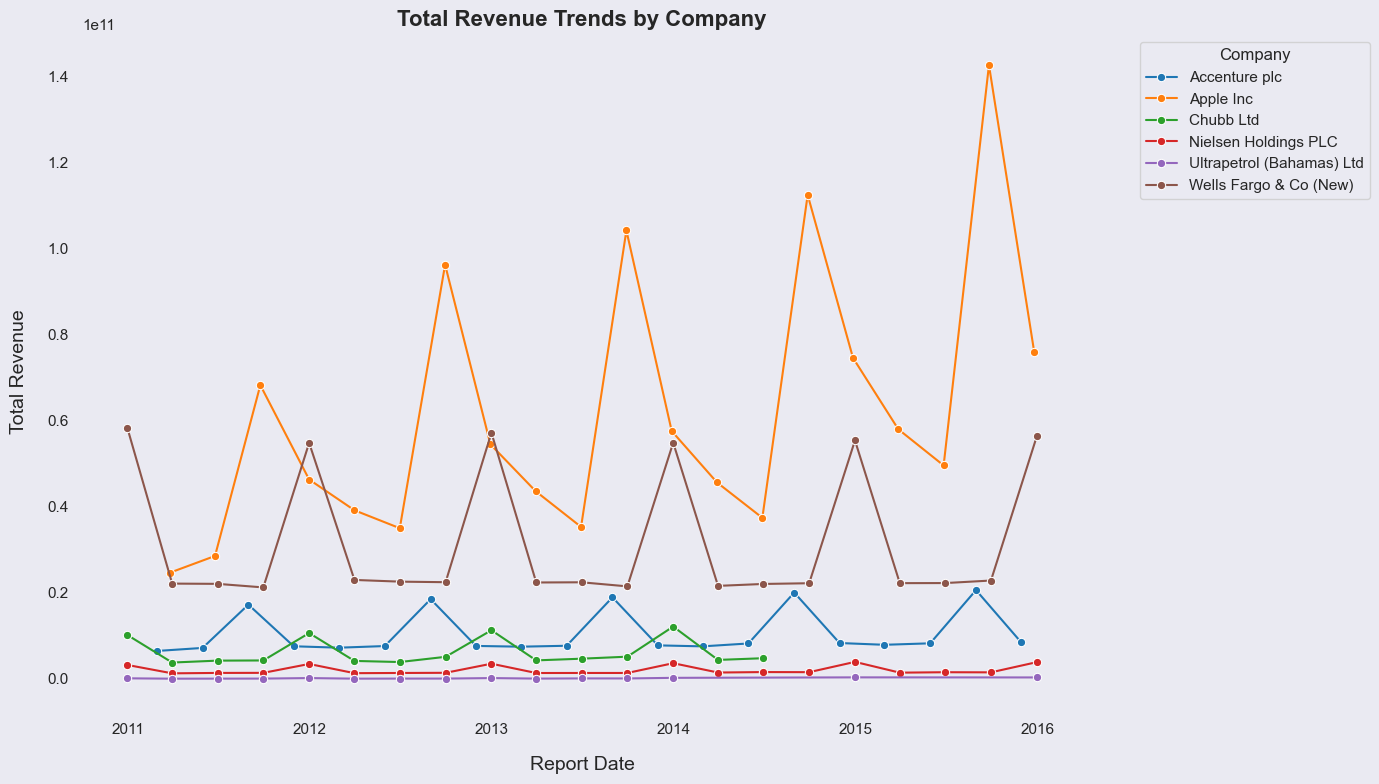

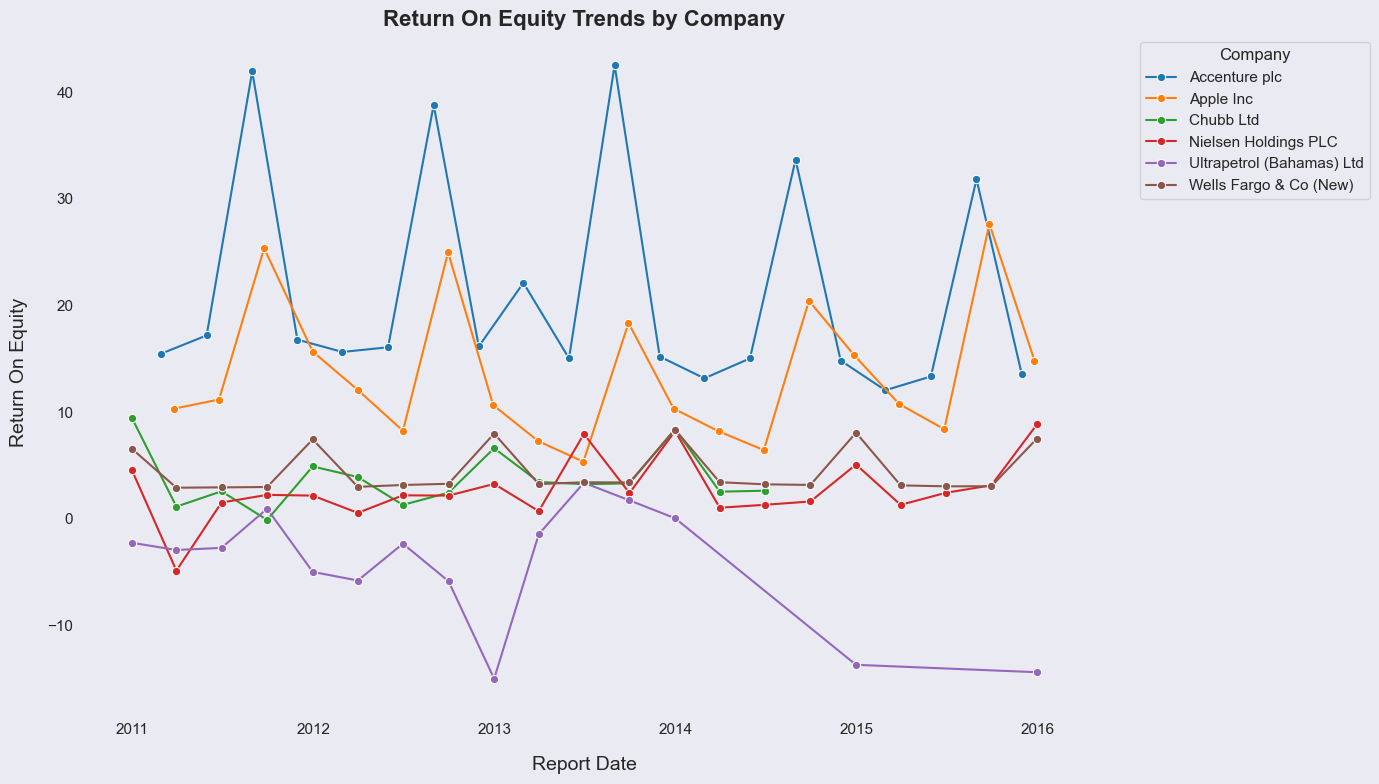

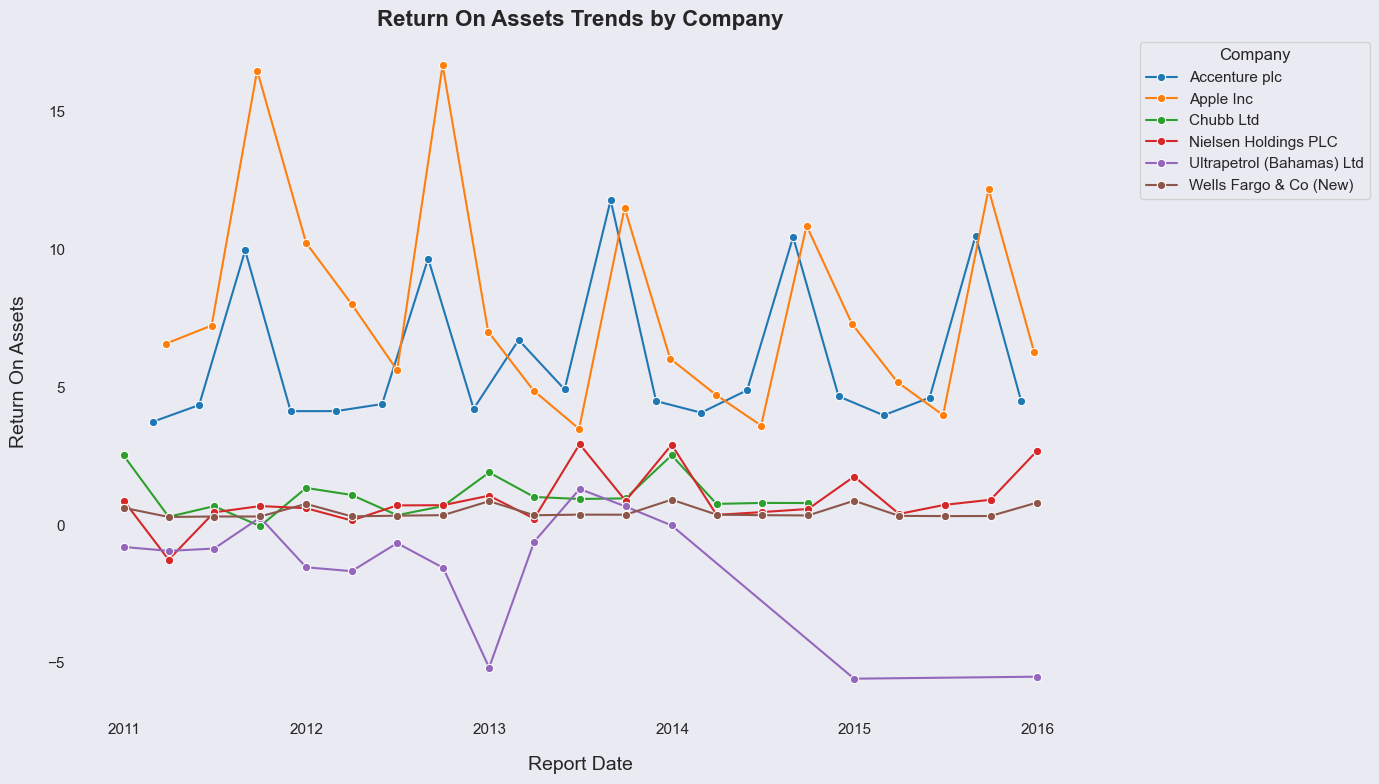

In [41]:
# Set plot style for consistency
sns.set_theme(style='dark')

# Loop through each growth indicator for analysis and visualization
for indicator in ['total_revenue', 'return_on_equity', 'return_on_assets']:
    plt.figure(figsize=(14, 8), facecolor='#EAEAF2')
    sns.lineplot(
        data=growth_data_pivoted,
        x='report_date', y=indicator, hue='company_name',
        marker='o', linewidth=1.5, palette="tab10"
    )
    plt.title(f"{indicator.replace('_', ' ').title()} Trends by Company", fontsize = 16, weight = 'bold')
    plt.xlabel("Report Date", fontsize = 14, labelpad = 14)
    plt.ylabel(indicator.replace('_', ' ').title(), fontsize = 14, labelpad = 14)
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title="Company")
    plt.xticks(rotation=0)
    sns.despine(bottom=True, left=True)
    plt.tight_layout()
    plt.show()

## Growth Indicators - Detailed Analysis

### Total Revenue:

- **Sustained Growth:** Companies with consistent revenue growth are expanding their market reach or improving sales strategies. Analyzing this with profitability indicators (like EBITDA) reveals if growth is accompanied by healthy margins.
- **Revenue Declines:** Companies with declining revenue trends may face competitive pressures or changing consumer preferences. These trends suggest a need for strategic shifts or innovation.

### Return on Equity (ROE):

- **High ROE:** High or increasing ROE values reflect efficient use of shareholder capital, an attractive feature for investors. Consistently high ROE may attract investment and bolster stock prices.
- **Declining ROE:** If ROE declines over time, it may indicate issues with cost control, asset management, or profitability relative to equity. Companies experiencing such trends may need to reassess operational efficiency or capital structure.

### Return on Assets (ROA):

- **High ROA:** A high ROA signifies efficient asset use for profit generation, particularly relevant in capital-intensive industries. Companies with high ROA are generally more capable of generating profit without requiring extensive asset bases.
- **ROA Declines:** Declining ROA values suggest that assets are not generating as much profit, possibly due to lower revenue or increased asset investment without corresponding gains. It’s useful to analyze these trends alongside revenue growth to see if the asset base is well-utilized.

In [43]:
def plot_financial_indicators(df, indicators, labels):
    """
    Plots horizontal bar charts for multiple financial indicators across countries.
    
    Parameters:
    df (DataFrame): A pandas DataFrame containing financial data, including 'country' and specified indicators.
    indicators (list): A list of financial indicators (columns in the DataFrame) to be plotted.
    labels (list): A list of labels corresponding to the indicators for the plot titles and axis labels.

    This function creates three separate bar charts in a single figure, sorted by each indicator
    in descending order. It visualizes the financial performance of countries based on the 
    provided indicators.
    """
    
    # Set the Seaborn theme for the plots (dark background for a clean look)
    sns.set_theme(style='dark')
    
    # Create a figure with 3 subplots stacked vertically, set the figure size and background color
    fig, axes = plt.subplots(3, 1, figsize=(12, 18), facecolor='#EAEAF2')

    # Loop over each indicator to create a separate bar chart for each
    for i, indicator in enumerate(indicators):
        # Sort the dataframe by the current indicator in descending order
        df_sorted = df.sort_values(by=indicator, ascending=False)
        
        # Create a horizontal bar plot for the current indicator
        sns.barplot(
            x=indicator,         # The financial indicator values for the x-axis
            y='country',         # The countries for the y-axis (bars will be horizontal)
            data=df_sorted,     # The sorted dataframe
            hue='country',       # Color the bars based on the country
            ax=axes[i],          # Assign the plot to the corresponding subplot
            palette='Blues_d',   # Use a blue color palette for the bars
            linewidth=0,         # Remove border lines from the bars
            legend=False         # Disable the legend for each subplot
        )
        
        # Set the title and customize the font style of the title
        axes[i].set_title(f'{labels[i]} by Country', fontsize=16, weight='bold')

        # Label the x-axis (financial indicator) with a customized font size and padding
        axes[i].set_xlabel(labels[i], fontsize=14, labelpad=14)

        # Label the y-axis (country names) with a customized font size and padding
        axes[i].set_ylabel('Country', fontsize=14, labelpad=14)

        # Remove the top and right spines to enhance the visual appeal
        sns.despine(bottom=True, left=True)

    # Adjust the layout to ensure the subplots don't overlap and everything fits well
    plt.tight_layout()

    # Show the plot with the configured layout
    plt.show()

## Profitability Indicators Across Countries

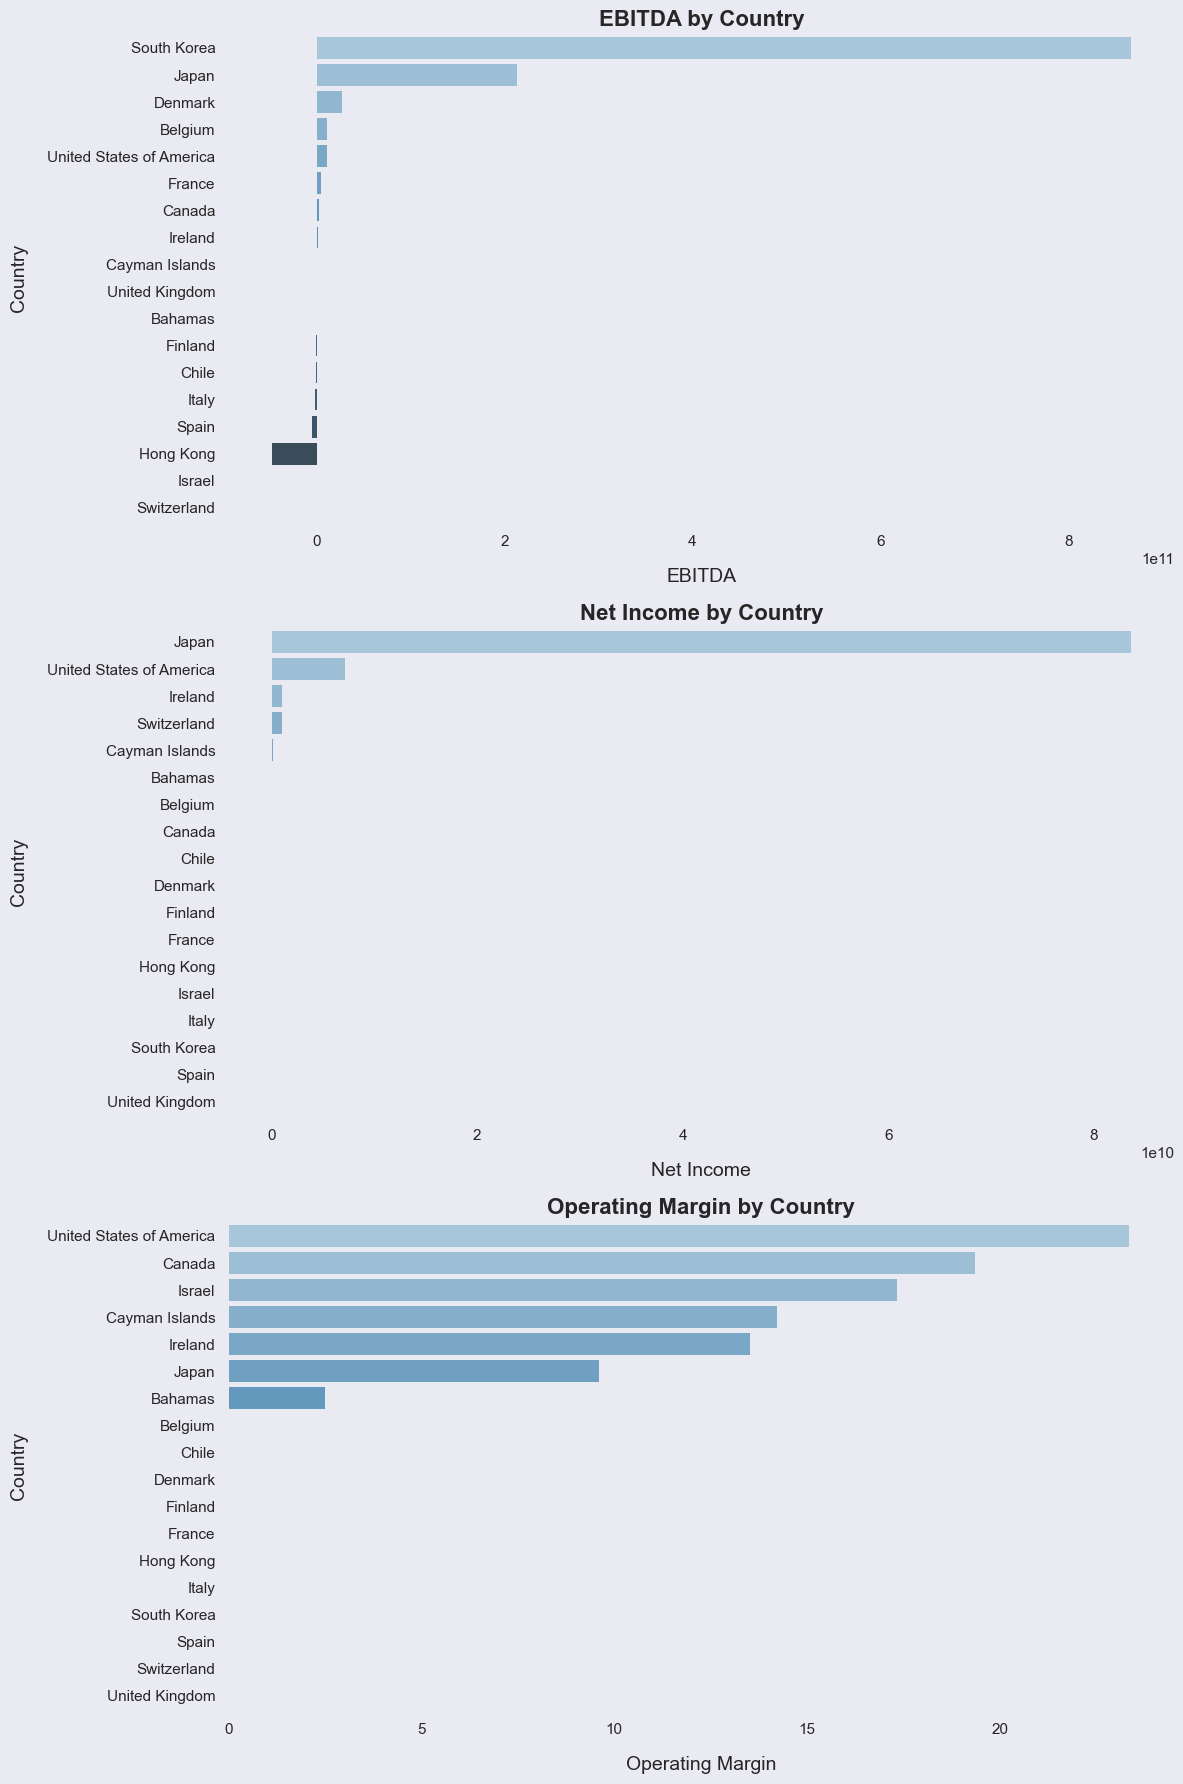

In [45]:
# Define the list of profitability indicators to be analyzed
profitability_indicators_cols = ['ebitda', 'net_income', 'operating_margin']

# Group the profitability data by 'country' and calculate the mean for each profitability indicator
profitability_country_avg = profitability_data_pivoted.groupby('country')[profitability_indicators_cols].mean()

# Visualize the profitability indicators by country using the plot_financial_indicators function
plot_financial_indicators(profitability_country_avg, profitability_indicators_cols, profitability_indicators)

## Profitability Indicators Analysis

### 1. **EBITDA (Earnings Before Interest, Taxes, Depreciation, and Amortization)**

- **Top Performers**: The highest EBITDA values are seen in countries like **South Korea** (866.87 billion), **Japan** (213.47 billion), and **Denmark** (27.09 billion). These countries likely have large-scale, high-profit businesses contributing to these substantial earnings.
- **Negative EBITDA**: Some countries, including **Bahamas** (-13.09 million), **Chile** (-897.19 million), and **Italy** (-1.73 billion), show negative EBITDA, indicating that companies within these countries may be struggling to maintain profitable operations. Negative EBITDA is often a red flag for financial difficulties or inefficiencies in operations.
- **Lack of Data**: Several countries like **Belgium**, **Finland**, and **Switzerland** do not have available EBITDA data, which could reflect incomplete or non-disclosed financial reporting for some companies.

### 2. **Net Income**

- **Top Performers**: The **United States of America** leads with a net income of approximately 7.09 billion, followed by **Japan** with about 83.64 billion. High net income values typically suggest strong profitability and operational efficiency in these countries.
- **Negative Net Income**: **Bahamas** reports a negative net income (-13.09 million), suggesting that companies in this country may be facing financial distress or operational challenges. Negative net income indicates that expenses surpass revenues, which is unsustainable over time.
- **Missing Data**: Countries such as **Belgium**, **Canada**, **Chile**, **Denmark**, **France**, and others have missing or unavailable net income data. The absence of this information makes it challenging to gauge the profitability of companies in these regions.

### 3. **Operating Margin**

- **Top Performers**: **United States of America** boasts the highest operating margin at 23.35%, followed by **Canada** at 19.35%. High operating margins are a good indicator of profitability, as they show that a company retains a significant portion of its revenue after accounting for variable costs.
- **Moderate Performers**: Countries like **Cayman Islands** (14.23%), **Ireland** (13.51%), and **Japan** (9.59%) demonstrate a solid ability to convert revenue into profit, though their margins are somewhat lower compared to the leading countries.
- **Low Operating Margins**: Some countries, including **Bahamas** (2.48%) and **Spain** (-3.51%), report very low or negative operating margins. Low or negative margins suggest companies in these regions may face challenges in controlling operating costs or generating profit from their sales.
- **Missing Data**: A significant amount of data for operating margins is missing, especially in countries like **Belgium**, **Finland**, **Hong Kong**, **Israel**, and **Switzerland**. This could indicate incomplete financial disclosures or a lack of financial activity in these regions.

### Summary

The profitability indicators show a wide variation across countries. The **United States of America** and **Japan** stand out with high net income and operating margins, suggesting strong financial performance. On the other hand, countries like **Bahamas**, **Chile**, and **Italy** are experiencing profitability challenges, as indicated by negative EBITDA, net income, and low operating margins. Missing data in several countries limits the ability to fully assess the profitability of companies in those regions. Overall, analyzing these profitability indicators can provide valuable insights into the financial stability and operational efficiency of companies across different countries.

## Liquidity Indicators Across Countries

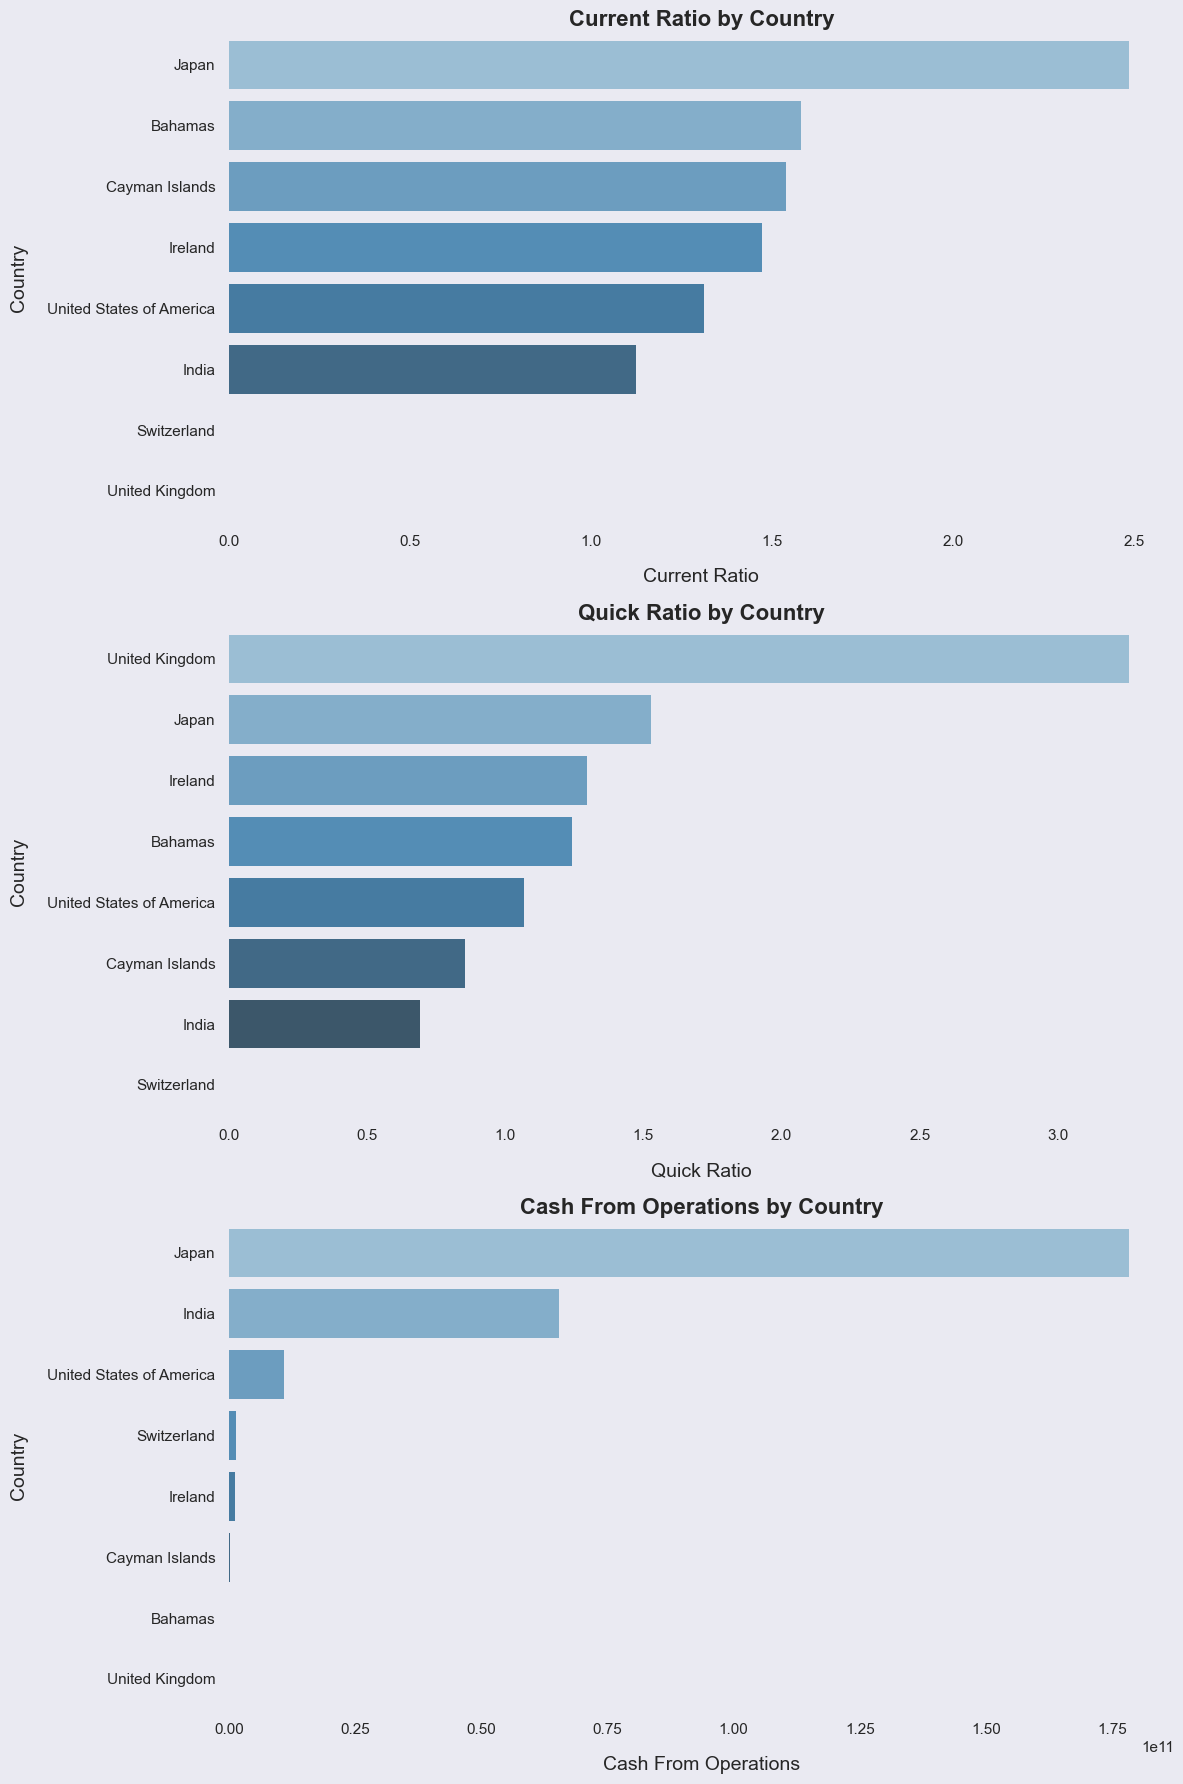

In [48]:
# Define the list of liquidity indicators to be analyzed
liquidity_indicators_cols = ['current_ratio', 'quick_ratio', 'cash_from_operations']

# Group the liquidity data by 'country' and calculate the mean for each liquidity indicator
liquidity_country_avg = liquidity_data_pivoted.groupby('country')[liquidity_indicators_cols].mean()

# Visualize the liquidity indicators by country using the plot_financial_indicators function
plot_financial_indicators(liquidity_country_avg, liquidity_indicators_cols, liquidity_indicators)

## Liquidity Indicators Analysis

### 1. **Current Ratio**

- **Top Performers**: Japan has the highest current ratio at 2.49, suggesting that companies in Japan maintain a healthy buffer of current assets over current liabilities. This indicates strong liquidity, which helps in covering short-term obligations with ease.
- **Moderate Ratios**: Countries such as **Bahamas** (1.58), **Cayman Islands** (1.54), **Ireland** (1.47), and **United States of America** (1.31) have relatively balanced current ratios. Ratios around 1.5–2.0 generally suggest sufficient but not excessive liquidity, which is optimal for stability without compromising resource utilization.
- **Lower Ratio**: **India** has a current ratio of 1.13, suggesting a tighter balance between current assets and liabilities, though still above 1.0. A lower current ratio may indicate that companies in India have fewer liquid resources to cover immediate debts, though this ratio is still within acceptable limits for certain industries.
- **Missing Data**: Countries like **Switzerland** and **United Kingdom** lack current ratio data, limiting the ability to assess short-term liquidity for companies in these regions.

### 2. **Quick Ratio**

- **Highest Quick Ratio**: **United Kingdom** stands out with an exceptionally high quick ratio of 3.26. This indicates that companies in the UK have a significant buffer of liquid assets (excluding inventory), which suggests strong liquidity. Such high values may also suggest under-utilized assets that could be reallocated for growth.
- **Moderate Ratios**: Countries like **Japan** (1.53), **Ireland** (1.30), and **Bahamas** (1.24) demonstrate healthy quick ratios, showing an ability to meet short-term obligations without relying on inventory.
- **Lower Ratios**: **India** (0.69) and **Cayman Islands** (0.85) show lower quick ratios, indicating a heavier reliance on inventory or potential liquidity challenges. Low quick ratios could mean that these countries’ companies might need to enhance their cash or receivables positions for better financial flexibility.
- **Missing Data**: **Switzerland** lacks quick ratio data, which restricts the analysis of its immediate liquidity position.

### 3. **Cash From Operations**

- **Top Performers**: **Japan** leads with substantial cash flow from operations (178.34 billion), indicating robust core business activities and a strong ability to generate cash from daily operations. **India** and **United States of America** also show significant cash flows from operations (65.46 billion and 10.85 billion, respectively), suggesting stable business operations that contribute positively to cash reserves.
- **Moderate Cash Flow**: **Ireland** has a moderate cash flow from operations at around 1.23 billion. While not as high as Japan, it still reflects positive operational performance.
- **Lower Cash Flow**: **Bahamas** and **Cayman Islands** report lower cash flows from operations (8.02 million and 209.20 million, respectively). Lower values may indicate smaller-scale business activities or challenges in generating consistent cash flows from core operations.
- **Missing Data**: Cash flow data is unavailable for **Switzerland** and **United Kingdom**, which hinders a full liquidity analysis for these countries.

### Summary

The liquidity indicators reveal substantial differences in financial resilience across countries. Japan shows strong liquidity across all metrics, indicating a solid financial footing and well-balanced current assets. The United Kingdom's high quick ratio suggests an abundance of liquid assets, while the Bahamas and Cayman Islands have lower liquidity, with moderate current ratios and lower cash flow. Missing data for some countries, such as Switzerland, restricts a comprehensive liquidity assessment. Overall, these insights can help identify regions where companies are well-prepared to cover short-term liabilities and those that may need to improve their liquidity management.

## Efficiency Indicators Across Countries

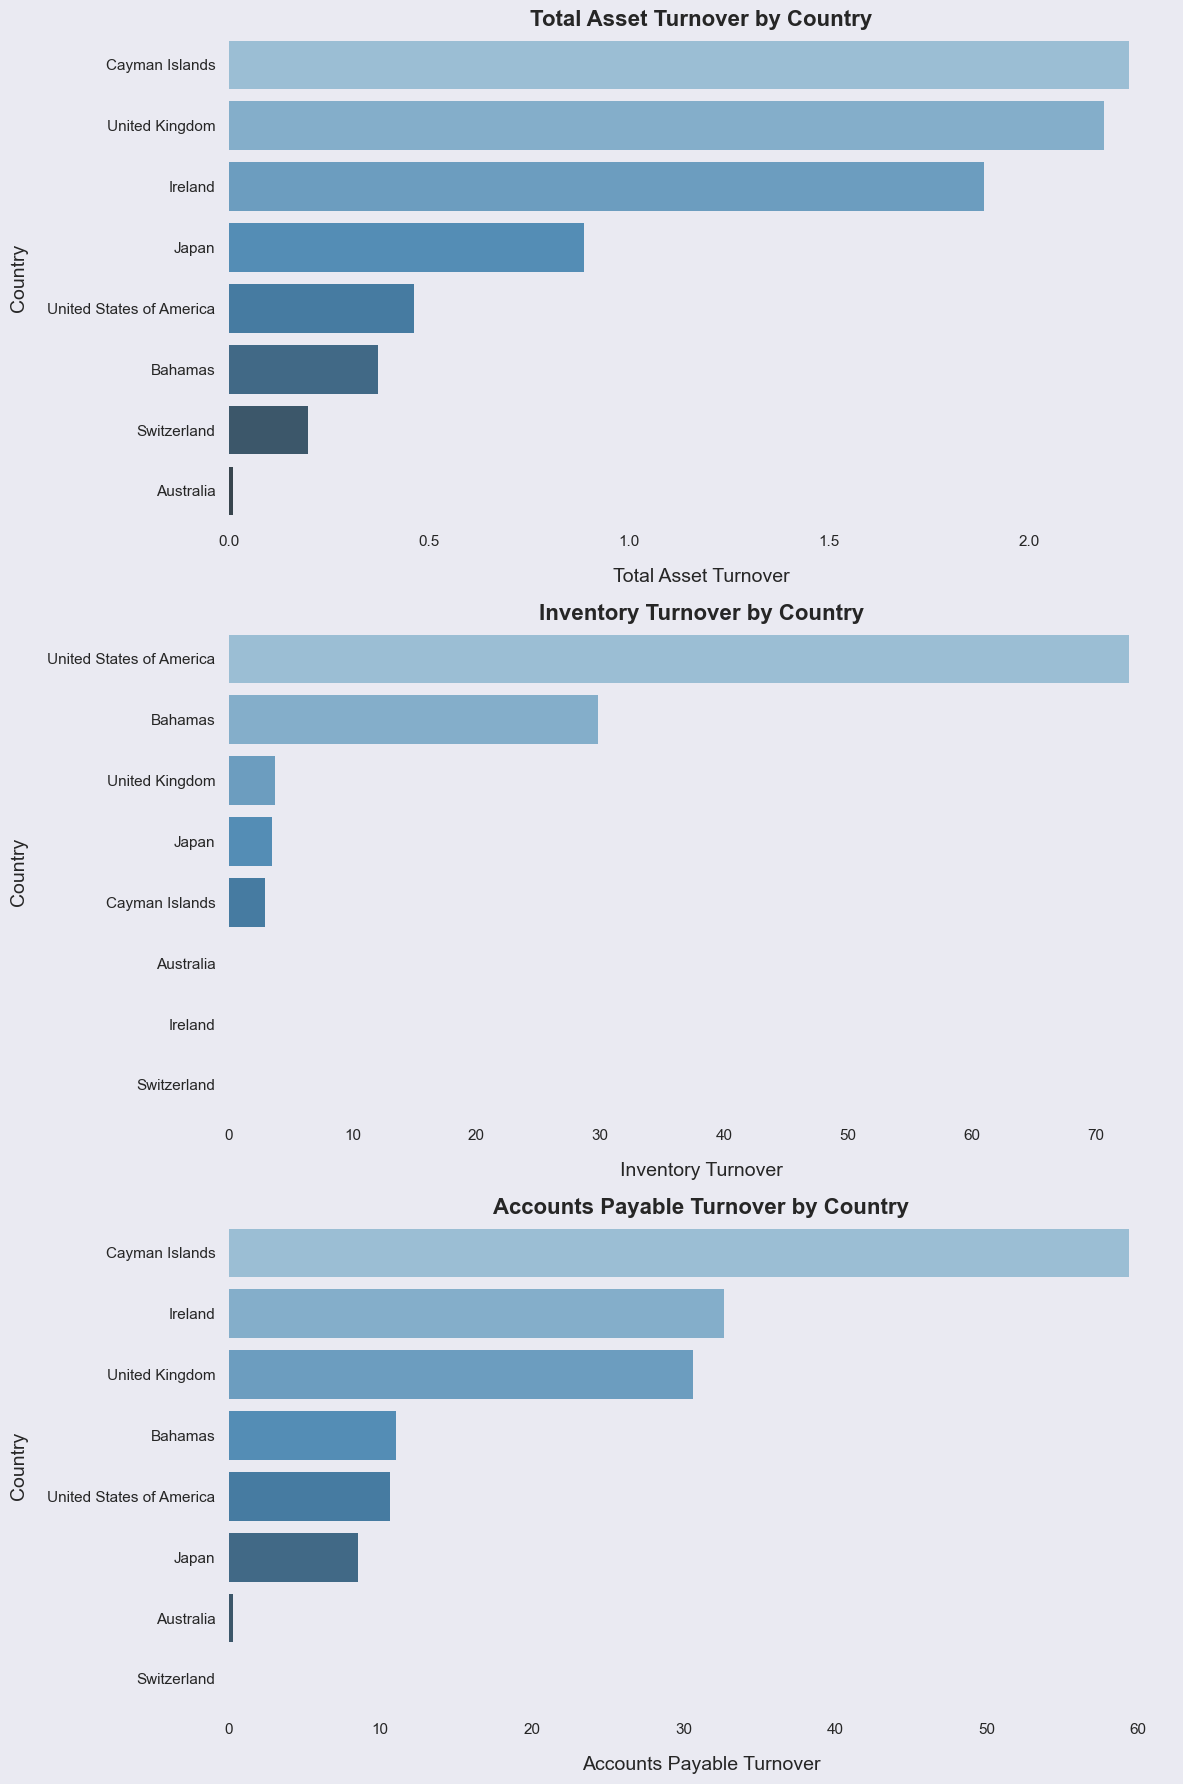

In [51]:
# Define the list of efficiency indicators to be analyzed
efficiency_indicators_cols = ['total_asset_turnover', 'inventory_turnover', 'accounts_payable_turnover']

# Group the efficiency data by 'country' and calculate the mean for each efficiency indicator
efficiency_country_avg = efficiency_data_pivoted.groupby('country')[efficiency_indicators_cols].mean()

# Visualize the efficiency indicators by country using the plot_financial_indicators function
plot_financial_indicators(efficiency_country_avg, efficiency_indicators_cols, efficiency_indicators)

## Efficiency Indicators Analysis

### 1. **Total Asset Turnover**

- **Top Performers**: The **Cayman Islands** and **United Kingdom** show high total asset turnover values of 2.25 and 2.19, respectively. These values suggest efficient asset utilization, meaning companies in these countries are effectively generating revenue from their assets.
- **Moderate Performers**: **Ireland** (1.89) and **Japan** (0.89) also demonstrate moderate asset turnover, indicating relatively efficient use of assets, although there is room for improvement.
- **Low Turnover**: Countries like **Australia** (0.01) and **Switzerland** (0.20) show very low asset turnover. Low values may indicate under-utilization of assets or challenges in converting assets into revenue. These regions may benefit from strategies to improve asset productivity.
- **Variability in Performance**: The large difference between the highest (2.25 in Cayman Islands) and lowest (0.01 in Australia) total asset turnover highlights varying levels of asset efficiency across countries.

### 2. **Inventory Turnover**

- **High Inventory Turnover**: The **United States of America** reports a notably high inventory turnover rate of 72.69, suggesting highly efficient inventory management. Such high turnover is advantageous, especially for companies in industries with perishable or quickly obsolete goods.
- **Moderate Inventory Turnover**: **Japan** (3.52), **United Kingdom** (3.77), and **Cayman Islands** (2.92) also show reasonably effective inventory turnover rates, indicating solid inventory management practices.
- **Missing Data**: Inventory turnover data is absent for several countries, including **Australia**, **Ireland**, and **Switzerland**, which limits insights into inventory management efficiency for these regions.

### 3. **Accounts Payable Turnover**

- **High Turnover Rates**: The **Cayman Islands** stands out with a high accounts payable turnover of 59.41, followed by **Ireland** (32.70) and **United Kingdom** (30.67). High turnover rates indicate that companies in these countries pay their suppliers relatively quickly, which can reflect good cash flow but may also indicate limited cash flexibility.
- **Moderate Rates**: **Bahamas** (11.05) and **United States of America** (10.65) show moderate accounts payable turnover, suggesting a balanced approach to supplier payments that allows for both flexibility and prompt payment.
- **Low Turnover Rate**: **Australia** shows a notably low accounts payable turnover of 0.26, which could mean delayed payments to suppliers, possibly as a cash retention strategy or due to cash flow constraints.
- **Missing Data**: Switzerland has no accounts payable turnover data, restricting the ability to evaluate payment practices for companies in this region.

### Summary

The efficiency indicators highlight significant differences in asset utilization, inventory management, and supplier payment strategies across countries. The **United States of America** demonstrates highly efficient inventory management, while **Cayman Islands** and **United Kingdom** lead in asset turnover, showcasing effective asset utilization. **Australia’s** low total asset turnover and accounts payable turnover suggest inefficiencies and potential cash flow challenges. Missing data in key areas, especially for **Switzerland**, limits the scope of a complete analysis. Overall, these indicators help identify areas where companies are excelling in efficiency and where improvements might be beneficial.

## Leverage Indicators Across Countries

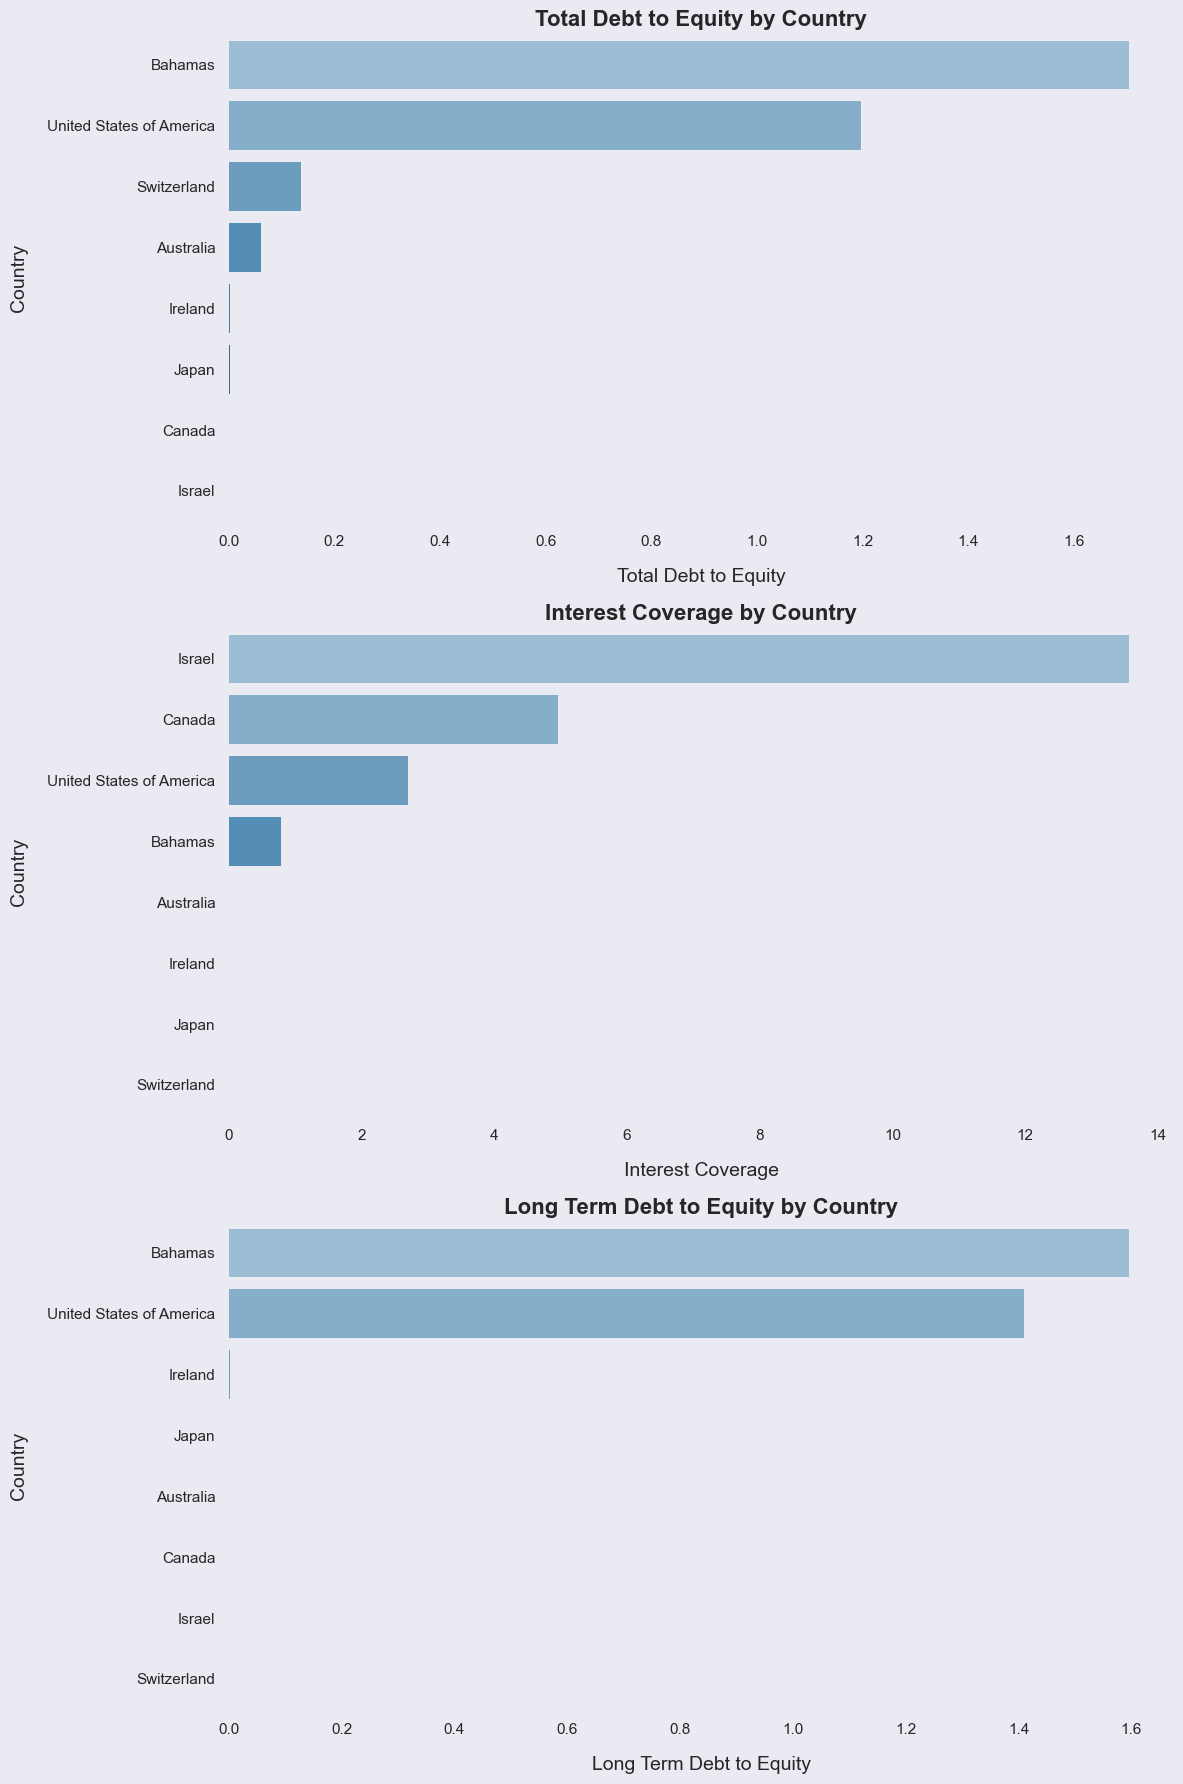

In [54]:
# Define the list of leverage indicators to be analyzed
leverage_indicators_cols = ['total_debt_to_equity', 'interest_coverage', 'long_term_debt_to_equity']

# Group the leverage data by 'country' and calculate the mean for each leverage indicator
leverage_country_avg = leverage_data_pivoted.groupby('country')[leverage_indicators_cols].mean()

# Visualize the leverage indicators by country using the plot_financial_indicators function
plot_financial_indicators(leverage_country_avg, leverage_indicators_cols, leverage_indicators)

## Leverage Indicators Analysis

### 1. **Total Debt to Equity**

- **High Debt Levels**: **Bahamas** has a total debt to equity ratio of 1.70, indicating a relatively high reliance on debt financing. This level of leverage may expose companies in the Bahamas to greater financial risk, especially if revenues fluctuate.
- **Moderate Debt Levels**: The **United States of America** has a debt to equity ratio of 1.20, reflecting moderate leverage that could support growth but may also entail some risk if economic conditions change.
- **Low or No Debt**: **Australia** (0.06) and **Switzerland** (0.14) maintain low total debt to equity ratios, suggesting a conservative approach to financing. **Ireland** and **Japan** report a ratio of 0, indicating little to no reliance on debt.
- **Missing Data**: Some countries, such as **Canada** and **Israel**, lack data for this metric, making it difficult to fully assess leverage levels across these regions.

### 2. **Interest Coverage**

- **Strong Coverage Ratios**: **Israel** shows a very high interest coverage ratio of 13.57, suggesting robust capacity to meet interest obligations from operating income. This is typically a sign of financial stability and low risk associated with debt servicing.
- **Moderate Coverage**: The **United States of America** has an interest coverage ratio of 2.70, indicating adequate but moderate capacity to meet interest payments, which could become a concern if cash flows decline or interest rates increase.
- **Low Coverage**: **Bahamas** reports an interest coverage ratio of 0.78, which is relatively low and indicates potential difficulty in meeting interest obligations. This may signal financial strain or vulnerability in the event of higher interest rates or lower earnings.
- **Missing Data**: Interest coverage data is absent for many countries, including **Australia**, **Ireland**, **Japan**, and **Switzerland**, limiting insights into the debt-servicing capacity of companies in these regions.

### 3. **Long Term Debt to Equity**

- **High Long-Term Debt**: The **Bahamas** and the **United States of America** have notable long-term debt to equity ratios of 1.60 and 1.41, respectively. These figures indicate a reliance on long-term debt financing, which can support growth but also adds long-term financial commitments.
- **Minimal or No Long-Term Debt**: **Ireland** and **Japan** report a long-term debt to equity ratio of 0, reflecting a very conservative financing approach, possibly due to lower growth ambitions or a preference for equity financing over debt.
- **Low Long-Term Debt**: **Australia** (NaN) and **Switzerland** (0.14) show low levels of long-term debt to equity, which may reflect cautious financial strategies or limited reliance on long-term financing.
- **Missing Data**: Some countries, such as **Canada** and **Israel**, have missing data in this metric, restricting a comprehensive comparison across all regions.

### Summary

The leverage indicators reveal varying strategies in debt management across countries. **Israel** demonstrates strong interest coverage, indicating a low risk in terms of debt servicing. **Bahamas** and the **United States of America** exhibit higher levels of both total and long-term debt, indicating reliance on leverage that could support growth but may add financial risk. **Ireland** and **Japan** report minimal or no debt, suggesting a conservative capital structure with low risk exposure. Missing data for key countries restricts a complete assessment, but overall, these metrics provide insight into the financial stability and debt management approaches across different regions.

## Growth Indicators Across Countries

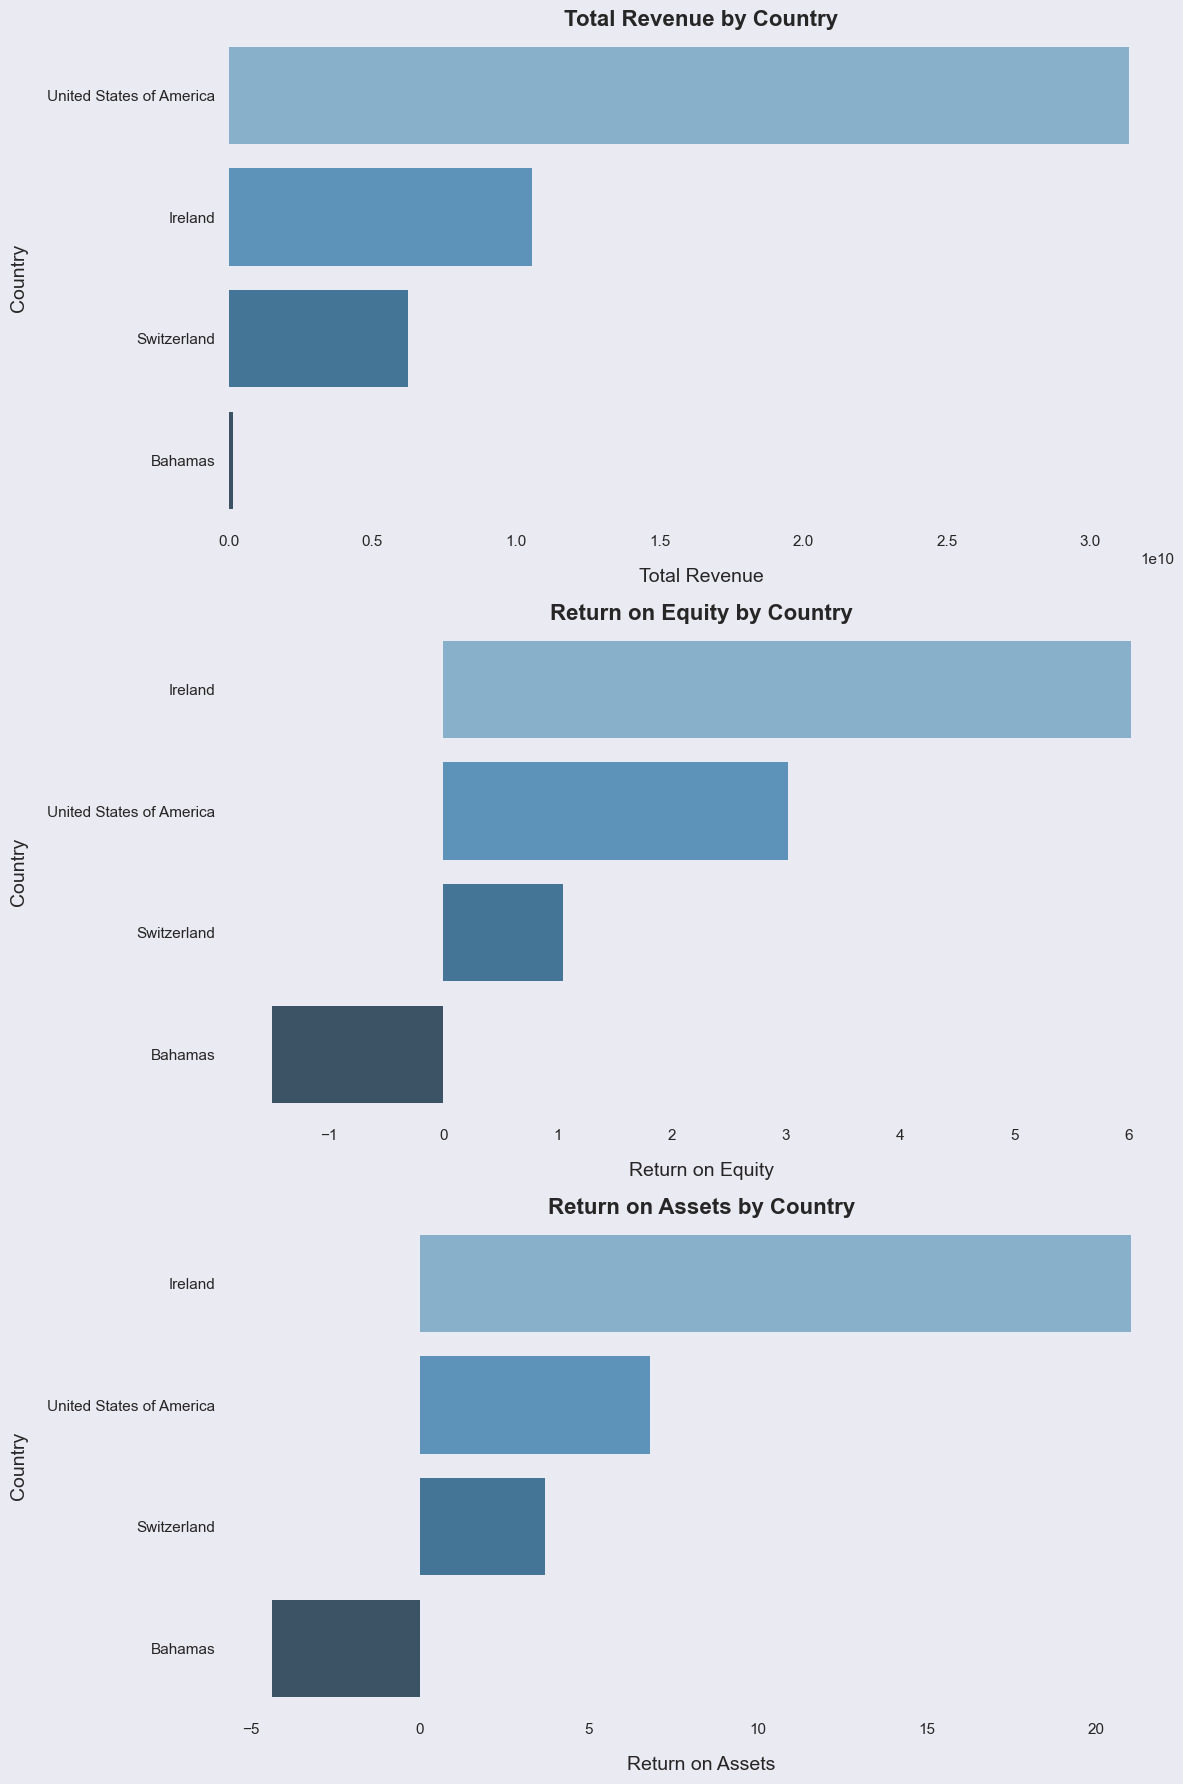

In [57]:
# Define the list of growth indicators to be analyzed
growth_indicators_cols = ['total_revenue', 'return_on_assets', 'return_on_equity']

# Group the growth data by 'country' and calculate the mean for each growth indicator
growth_country_avg = growth_data_pivoted.groupby('country')[growth_indicators_cols].mean()

# Visualize the growth indicators by country using the plot_financial_indicators function
plot_financial_indicators(growth_country_avg, growth_indicators_cols, growth_indicators)

## Growth Indicators Analysis

### 1. **Total Revenue**

- **Top Revenue Generators**: The **United States of America** leads with an average total revenue of approximately 31.35 billion, followed by **Ireland** with 10.56 billion. High total revenue suggests a substantial market presence and effective revenue generation capabilities in these countries.
- **Moderate Revenue**: **Switzerland** shows total revenue of 6.22 billion, indicating a solid but more moderate market scale compared to the U.S. and Ireland.
- **Low Revenue**: The **Bahamas** has a much lower total revenue (150.50 million), suggesting smaller market activities or fewer large-scale companies within this region.

### 2. **Return on Assets (ROA)**

- **High ROA**: **Ireland** reports an ROA of 6.02%, indicating efficient use of assets to generate income. A higher ROA generally reflects well-managed assets contributing positively to profitability.
- **Moderate ROA**: The **United States of America** has an ROA of 3.02%, suggesting reasonable asset efficiency but with room for improvement compared to Ireland.
- **Low or Negative ROA**: **Switzerland** shows a low ROA of 1.05%, while **Bahamas** has a negative ROA of -1.50%, indicating asset inefficiencies. For the Bahamas, this negative ROA implies that assets are not generating adequate returns, potentially reflecting operational challenges.

### 3. **Return on Equity (ROE)**

- **High ROE**: **Ireland** again leads with an ROE of 21.03%, demonstrating effective generation of returns for shareholders. High ROE values often suggest profitable operations and successful use of equity financing.
- **Moderate ROE**: The **United States of America** shows an ROE of 6.81%, reflecting moderate shareholder returns but also a potential for improved efficiency in equity utilization.
- **Low or Negative ROE**: **Switzerland** reports a lower ROE of 3.71%, and the **Bahamas** has a negative ROE of -4.38%. A negative ROE in the Bahamas suggests that shareholder investments are not yielding positive returns, likely due to underlying financial or operational issues.

### Summary

The growth indicators highlight varied levels of revenue generation and return on investment efficiency across countries. **Ireland** stands out with high ROA and ROE values, suggesting efficient asset and equity usage. The **United States of America** shows solid revenue generation but moderate ROA and ROE, indicating stable but improvable efficiency. **Switzerland** has lower returns on assets and equity, while the **Bahamas** shows negative ROA and ROE, pointing to significant profitability challenges. Overall, these metrics reveal insights into how well companies in each country are utilizing their resources to achieve growth.

# Key Insights from Financial Indicators Across Countries

Through the analysis of profitability, liquidity, efficiency, leverage, and growth indicators, several countries consistently demonstrate strong financial metrics, highlighting them as potentially advantageous locations for running a successful business. By aggregating data across these indicators, we observe the top-performing countries with stable profitability, efficient asset and liability management, balanced leverage, and strong growth potential.

### Profitability

- **Top Countries**: **United States of America** and **Japan**. These countries stand out with robust net income and high operating margins, indicating efficient operational performance and healthy profit margins. This highlights an ability to convert revenue into profit effectively.
- **Challenges**: Countries like **Bahamas** and **Chile** experience profitability challenges with negative EBITDA and net income, suggesting less favorable conditions for business success.

### Liquidity

- **Top Countries**: **Japan** and **Ireland**. Japan’s high Current and Quick Ratios demonstrate excellent short-term financial health and liquidity, indicating stability in covering liabilities. Ireland’s strong liquidity ratios, coupled with substantial cash from operations, reflect a favorable cash flow position for business operations.
- **Challenges**: The **Bahamas** has a lower Quick Ratio and moderate cash from operations, signaling potential liquidity constraints. Countries with missing liquidity data, like the **United Kingdom**, lack full insight into financial stability.

### Efficiency

- **Top Countries**: **United Kingdom** and **Cayman Islands**. High Total Asset Turnover in the United Kingdom and efficient Accounts Payable Turnover rates indicate excellent asset utilization and effective liability management, supporting business growth and flexibility.
- **Challenges**: **Australia** and **Switzerland** show very low turnover values, suggesting potential inefficiencies in asset utilization. Limited data also restricts the full assessment of some countries’ efficiency.

### Leverage

- **Top Countries**: **United States of America** and **Canada**. The United States maintains a balanced debt-to-equity ratio and solid interest coverage, reflecting sustainable leverage levels. Canada’s high interest coverage also indicates resilience in debt management.
- **Challenges**: **Bahamas** has high debt-to-equity and low interest coverage, indicating potential financial strain. Low or missing leverage data in countries like **Australia** limits comprehensive assessment but may suggest a conservative approach to debt.

### Growth

- **Top Countries**: **Ireland** and **United States of America**. Ireland leads with strong ROA and ROE, signaling high efficiency in asset and equity utilization. The United States also shows substantial revenue, contributing to an overall favorable growth environment.
- **Challenges**: **Bahamas** faces significant growth challenges with negative ROA and ROE, suggesting struggles in achieving profitability and asset efficiency. Switzerland’s moderate growth indicators suggest stable but limited expansion potential.

### Top 3 Countries for Running a Successful Business

Considering the balance across all financial indicators, the top three countries for running a successful business are:

1. **United States of America**: With consistently strong performance in profitability, leverage, and growth indicators, the U.S. offers a balanced environment for business success. High revenue, solid net income, efficient asset management, and sustainable leverage levels make it a top choice.

2. **Ireland**: Strong liquidity, high ROA, and ROE, and moderate profitability indicators position Ireland as a favorable environment. Its efficient asset utilization and high return on equity highlight robust financial management and growth opportunities.

3. **Japan**: Demonstrating strong liquidity ratios and solid profitability, Japan is another strong candidate. Its ability to manage short-term liabilities and generate profit while maintaining efficiency in asset turnover suggests a stable environment for businesses.

These countries, with stable revenue generation, balanced leverage, and strong profitability and liquidity metrics, offer attractive conditions for successful business operations.


## Conclusion

This project set out to evaluate the financial performance of companies across various countries, with a focus on key indicators in profitability, liquidity, efficiency, leverage, and growth. Through data aggregation, descriptive analysis, and visualizations, I explored how countries compare in terms of asset utilization, revenue generation, debt management, and overall financial health, aiming to pinpoint locations with optimal conditions for business success.

The analysis identified the **United States**, **Ireland**, and **Japan** as standout countries, each showing strengths in critical financial metrics that support stability and growth. While each country displayed distinct financial characteristics, this comparative approach revealed that successful business environments often feature a balance of efficient asset use, healthy cash flow, and controlled leverage. These findings provide a clear view of the diverse financial environments worldwide, highlighting promising regions for future business considerations.